In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from sklearn.metrics import r2_score
import csv
from io import StringIO
#import missingno as msno
import io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('PDF')
#from StringIO import StringIO
from sklearn import linear_model, metrics, pipeline, preprocessing
from sklearn.preprocessing import FunctionTransformer
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler  
import calendar

In [2]:
%run Cycle_Car_preprocess.ipynb

155
Rows in car data  101669
carpercentmissing 0
carpercentmissing 0.0
Rows in cycle data  868084
504602
4340420
cyclepercentmissing 0.11625649130729285
Rows in the met data  8784
Sensor id  10000010 [] Rows  9506
Sensor id  10000210 [] Rows  26283
Sensor id  10000480 [] Rows  26283
Sensor id  10000790 [] Rows  26283
cyclepercentmissing 0.11625649130729285
   SENSOR_ID                TIME  LANE  SUM        DTC
0   10000010 2015-02-01 00:00:00  99.0  5.0  43.631375
1   10000010 2015-02-01 01:00:00  99.0  2.0  43.631375
2   10000010 2015-02-01 02:00:00  99.0  6.0  43.631375
3   10000010 2015-02-01 03:00:00  99.0  5.0  43.631375
4   10000010 2015-02-01 04:00:00  99.0  4.0  43.631375
Rows in cycling data combined with met  88345
Rows in car data combined with met  101661
Station id  300016
Station id  300099
Station id  300233
Station id  302257
Station id  300083
Rows in cycling data combined with met  78840 101661 0 101661
(101661, 13)
(78840, 13)


In [3]:
del cycle_met_clean_data['WEEKDAY']
del cycle_met_clean_data['MONTH']
cycle_met_clean_data['WEEKDAY'] = cycle_met_clean_data['TIME'].dt.weekday #weekday_name#Insert a column with weekday name
cycle_met_clean_data['MONTH'] = cycle_met_clean_data['TIME'].dt.month
cycle_met_clean_data.head()


/home/mandart/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mandart/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SENSOR_ID,TIME,LANE,SUM,DTC,STATION_ID,WIND_MAG,TEMP,PPT,RH,HOUR,WEEKDAY,MONTH
1,10000210,2015-02-01 01:00:00,0.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
2,10000210,2015-02-01 01:00:00,1.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
3,10000210,2015-02-01 01:00:00,2.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
4,10000480,2015-02-01 01:00:00,0.0,1.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2
5,10000480,2015-02-01 01:00:00,1.0,0.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2


In [4]:
car_met_clean_sensor_location['WEEKDAY'] = car_met_clean_sensor_location['TIME'].dt.weekday #weekday_name#Insert a column with weekday name
car_met_clean_sensor_location['MONTH'] = car_met_clean_sensor_location['TIME'].dt.month
car_met_clean_sensor_location.head()

,SENSOR_ID,DIRECTION,SUM,TIME,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR,DTC
0,300016,1,284,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
1,300016,2,317,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
2,300016,1,165,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
3,300016,2,216,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
4,300016,1,98,2015-02-01 03:00:00,18700,6.5,-1.5,0.1,79,6,2,3,333.665928


In [5]:
#Visualizing and Manipulating/Creating columns of dataframe
#S300099['temp_F']=S300099.TempC*1.8+32  ###Adds a column by using another column
#S300099.rename(columns={'SUM':'total'},inplace=1) ##Renames
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
#S300099['temp_cut']=pd.cut(S300099.TempC,[-15,0,15,30])  
#plt.rcParams['figure.figsize']=(14,12)
#plt.rcParams['font.size']=14
#sns.set_style("whitegrid")
#g=sns.swarmplot(x='HOUR',y='SUM',hue='temp_cut',data=S300099)
#g.set(xlabel="Hour within a Day", ylabel="Number of Cars on Road")
#del S300099['temp_cut']

#Data viewing
#S300099.head()
#S300099.tail(3)
#S300099.describe()
#S300099.index
#S300099.columns

#Data sorting by index and by label
#S300099.sort_index(axis=1, ascending=False)
#S300099.sort_values(by='STARTHOUR')
#S300099.T

#Dataframe copying
#df=S300099.copy()

#df[['B', 'A']] = df[['A', 'B']] # cOLUMN NAME IS SAME BUT COLUMN VALUES INTERCHANGED
#dfa['A'] = list(range(len(dfa.index)))   #Create A
#dfa.A = list(range(len(dfa.index)))   #If A already exists

#Slicing - Selecting by label and Selecting by location
#df.iloc[:, 1:3]
#df[:3]
#df.where(df < 0, -df)

#Missing data
#df1.dropna(how='any')
#df1.fillna(value=5)

#Functions
#df.apply(np.mean, axis=1)
#df.apply(lambda x: x.max() - x.min())
#df.apply(np.exp)
#df.apply(np.cumsum)




**INFORMATION ABOUT DATA**
Assessing column - Generally, you can access a column of the DataFrame through indexing using the [] operator (e.g. df['col']), or through attribute (e.g. df.col). Attribute accessing makes the code a bit more concise when the target column name is known beforehand, but has several caveats -- for example, it does not work when the column name is not a valid Python identifier (e.g. df.123), or clashes with the built-in DataFrame attribute (e.g. df.index). On the other hand, the [] notation should always work.

**OUTLIER DETECTION**


In [6]:
cycle_met_clean_data.dtypes

cycle_met_clean_data.shape

#column_list = car_met_clean_sensor_location.columns.values.tolist()
#for column_name in column_list:
#    print (car_met_clean_sensor_location[column_name].unique())
    
    
#msno.matrix(S300099,figsize=(12,5))
#corr = S300099.corr()
#sns.heatmap(corr, 
 #           xticklabels=corr.columns.values,
#          yticklabels=corr.columns.values)
#plt.figure()
#plt.ylabel('SUM')
#S300099.groupby('TIME').size().plot(x='TIME',y='SUM',kind = 'bar',figsize = (14,4))


cycle_met_clean_dataNOOUTLIERS=cycle_met_clean_data[np.abs(cycle_met_clean_data["SUM"]-cycle_met_clean_data["SUM"].mean())<=(3*cycle_met_clean_data["SUM"].std())] 
print ("Shape before Outlier removal: ",cycle_met_clean_data.shape)
print ("Shape  After Outlier removal: ",cycle_met_clean_dataNOOUTLIERS.shape)

car_met_clean_sensor_locationNOOUTLIERS=car_met_clean_sensor_location[np.abs(car_met_clean_sensor_location["SUM"]-car_met_clean_sensor_location["SUM"].mean())<=(3*car_met_clean_sensor_location["SUM"].std())] 
print ("Car Shape before Outlier removal: ",car_met_clean_sensor_location.shape)
print ("Car Shape  After Outlier removal: ",car_met_clean_sensor_locationNOOUTLIERS.shape)

Shape before Outlier removal:  (78840, 13)
Shape  After Outlier removal:  (77075, 13)
Car Shape before Outlier removal:  (101661, 13)
Car Shape  After Outlier removal:  (101661, 13)


Feature Selection methods if required
http://scikit-learn.org/stable/modules/feature_selection.html

In [7]:
S300099=car_met_clean_sensor_locationNOOUTLIERS.copy()
S300099.head()

,SENSOR_ID,DIRECTION,SUM,TIME,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR,DTC
0,300016,1,284,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
1,300016,2,317,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
2,300016,1,165,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
3,300016,2,216,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
4,300016,1,98,2015-02-01 03:00:00,18700,6.5,-1.5,0.1,79,6,2,3,333.665928


## Feature Engineering or preprocessing## 
Continuouse variables are quantitative values. Computer can understand numbers.

Category variables are qualitative. They are distinctly sub-divided into categories . (Nominal - no order and no comparison. Ordinal - Ranked and comparison is possible . Dichotomous (or Binary) with Yes and No). Category variables need to be converted using encoding. There are numerous ways of encoding as mentioned in  https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 , some popular ones are using one hot encoding (for nominal variables) or label encoding (for ordinal variables).  https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/ 

Cyclic variables (hour of day 23 and 0, weekday - sunday to monday) and Non-Cyclic variables. See how to treat them :  http://blog.davidkaleko.com/feature-engineering-cyclical-features.html, and https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning.


In [8]:
#X2 = S300099.ix[:,S300099.columns != 'SUM']
#y2 = S300099.ix[:,S300099.columns == 'SUM']

X2 = S300099.iloc[:,S300099.columns != 'SUM']
y2 = S300099.iloc[:,S300099.columns == 'SUM']

## convert to matrices 
X2 = np.matrix(X2.values)
y2 = np.array(y2.values)
print(S300099.shape)

#S300099=S300099.ix[:,S300099.columns != 'AVGSPEED']

print(S300099.head())
print('before', S300099.shape)
S300099['xHOUR']= np.sin(2*np.pi*S300099['HOUR']/24)
S300099['yHOUR']= np.cos(2*np.pi*S300099['HOUR']/24)
S300099['xdirection']= np.sin(np.pi*S300099['DIRECTION']/180)
S300099['ydirection']= np.cos(np.pi*S300099['DIRECTION']/180)
S300099=S300099.rename(index=str, columns={"TEMP": "TempC", "PPT": "Pptmm","RH": "Humidpercen","WIND_MAG": "WINDSPEED"})
print(S300099.head())
#hour remove from above
#', 'DirectionDeg',



#Data Classification

#binary_data_columns = ['holiday', 'workingday']
#binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

#categorical_data_columns = ['season', 'weather', 'month'] 
#categorical_data_columns = ['WEEKDAY'] 

S3000991=S300099.copy()
S300099.drop(['SENSOR_ID','DIRECTION','SUM','TIME','STATION_ID','DIRECTION','HOUR'],inplace=True,axis = 1) #'HOUR',

categorical_data_columns = ['MONTH','WEEKDAY'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in S300099.columns], dtype = bool)
#S300099.drop(categorical_data_columns,inplace=True, axis = 1)
print('categoricaldata',categorical_data_indices)

numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
print('after', S300099.shape)

#numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in S300099.columns], dtype = bool)
print('numericdata',numeric_data_indices)
#['xHOUR','yHOUR','xdirection','ydirection','TempC','Pptmm','Humidpercen','AVGSPEED']

transformer_list = [        
            #binary
            #('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
          ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                     ])),
        ]



(101661, 13)
   SENSOR_ID  DIRECTION  SUM                TIME  STATION_ID  WIND_MAG  TEMP  \
0     300016          1  284 2015-02-01 01:00:00       18700       5.8  -1.0   
1     300016          2  317 2015-02-01 01:00:00       18700       5.8  -1.0   
2     300016          1  165 2015-02-01 02:00:00       18700       6.2  -1.3   
3     300016          2  216 2015-02-01 02:00:00       18700       6.2  -1.3   
4     300016          1   98 2015-02-01 03:00:00       18700       6.5  -1.5   

   PPT  RH  WEEKDAY  MONTH  HOUR         DTC  
0  0.0  75        6      2     1  333.665928  
1  0.0  75        6      2     1  333.665928  
2  0.0  77        6      2     2  333.665928  
3  0.0  77        6      2     2  333.665928  
4  0.1  79        6      2     3  333.665928  
before (101661, 13)
   SENSOR_ID  DIRECTION  SUM                TIME  STATION_ID  WINDSPEED  \
0     300016          1  284 2015-02-01 01:00:00       18700        5.8   
1     300016          2  317 2015-02-01 01:00:00      

count=0
for var in categorical_data_indices:
    if var==True:
        S300099[count] = S300099[count].astype("category")
        count0count+1
    
dataTypeDf = pd.DataFrame(S300099.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")    

## Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

In [ ]:
#print(S300099['WEEKDAY'].unique())
#print(S300099['MONTH'].unique())
df_dummies1 = pd.get_dummies(S300099[categorical_data_columns[0]])
df_dummies1.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_dummies2 = pd.get_dummies(S300099[categorical_data_columns[1]])
df_dummies2.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#print(S300099[categorical_data_columns])
#print(S300099.head())
#print(S300099[numeric_data_columns])

#del df_dummies[df_dummies.columns[-1]]
#print('Dummies',df_dummies.head())
df_new = pd.concat([S300099[numeric_data_columns], df_dummies1, df_dummies2 ], axis=1)
#print('New',df_new)
#del df_new[categorical_data_columns]
corrMatt = df_new.corr()
#mask = np.array(corrMatt)
#mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
#fig.set_size_inches(20,10)
sns.set(font_scale=2.1)
ax=sns.heatmap(corrMatt, vmax=1, square=True,center=0,linewidths=.5,cmap="YlGnBu")
for label in ax.get_yticklabels():
        label.set_weight("bold")
for label in ax.get_xticklabels():
        label.set_weight("bold")
        
fig.savefig('cycleCorrelations.pdf',bbox_inches='tight')

## Visualizing Distribution Of Data
As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

fig,axes = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(12, 10)
sns.distplot(S3000991["SUM"])#ax=axes[0]
fig.savefig('Distribution.pdf',bbox_inches='tight')
#stats.probplot(S300099["SUM"], dist='norm', fit=True, plot=axes[0][1])
#sns.distplot(np.log(S300099["SUM"]),ax=axes[1])
#stats.probplot(np.log1p(S300099["SUM"]), dist='norm', fit=True, plot=axes[1][1])

# Visualizing Count Vs Independent variables

def violinplot(data_in,key,target,xlabel,ylabel,title,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    plt.figure(figsize=(16,6))
    sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.title(title, fontsize=25)
    #plt.show()
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()

plt.figure(1)
#(ax1,ax2)= plt.subplots(nrows=2), plt.figure(figsize=(16,6))
#fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(S3000991.groupby("MONTH")["SUM"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="SUM",ascending=False)
ax1=sns.barplot(data=monthSorted,x="MONTH",y="SUM")#,order=sortOrder
ax1.set(xlabel='Month', ylabel='Average Bike Count',title="Average Bike Count By Month")
fig = ax1.get_figure()
fig.savefig('MonthSumoriginal.pdf',bbox_inches='tight')
#plt.show()

plt.figure(2)
hourAggregated = pd.DataFrame(S3000991.groupby(["HOUR","WEEKDAY"],sort=True)["SUM"].mean()).reset_index()
ax2=sns.pointplot(x=hourAggregated["HOUR"],y=hourAggregated["SUM"],hue=hourAggregated["WEEKDAY"], data=hourAggregated)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekday",label='big')
#mylabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#ax2.legend(labels=mylabels)
#plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#for t, l in zip(ax2.legend.get_texts(), new_labels): t.set_text(l)
fig = ax2.get_figure()
fig.savefig('Weekhourcount.pdf',bbox_inches='tight')
#plt.show()

violinplot(car_met_clean_sensor_location,'HOUR','SUM','Time','No. of vehicles','car_count_vs_hours','car_count_vs_hours.pdf')
violinplot(cycle_met_clean_data,'HOUR','SUM','Time','No. of bikes','cycle_count_vs_hours','car_count_vs_hours.pdf')


violinplot(car_met_clean_sensor_location,'WEEKDAY','SUM','Time','No. of vehicles','car_count_vs_weekday','car_count_vs_weekday.pdf')
violinplot(cycle_met_clean_data,'WEEKDAY','SUM','WEEKDAY','No. of bikes','cycle_count_vs_weekday','cycle_count_vs_weekday.pdf')

violinplot(car_met_clean_sensor_location,'MONTH','SUM','Time','No. of vehicles','car_count_vs_month','car_count_vs_month.pdf')
violinplot(cycle_met_clean_data,'MONTH','SUM','month','No. of bikes','cycle_count_vs_month','cycle_count_vs_month.pdf')



In [ ]:
#S300099.drop(['SENSOR_ID','DIRECTION','SUM','TIME','STATION_ID','HOUR','DIRECTION'],inplace=True,axis = 1)
#numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
#print(S300099.head())

**SPLIT TRAINING AND TEST DATA NEXT**

In [9]:
S3000991.describe()

,SENSOR_ID,DIRECTION,SUM,STATION_ID,WINDSPEED,TempC,Pptmm,Humidpercen,WEEKDAY,MONTH,HOUR,DTC,xHOUR,yHOUR,xdirection,ydirection
count,101661.000000,101661.000000,101661.000000,101661.0,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,1.016610e+05,101661.000000,101661.000000
mean,300440.841021,1.499985,1204.745055,18700.0,2.632819,6.169807,0.092364,77.453438,3.018532,7.334789,11.505877,335.074788,-0.000561,-4.640494e-05,0.026176,0.999619
std,784.397326,0.500002,917.588820,0.0,1.626225,7.599956,0.478862,17.443030,1.996503,3.716006,6.922391,2.309154,0.707153,7.070674e-01,0.008724,0.000228
min,300016.000000,1.000000,0.000000,18700.0,0.100000,-16.200000,0.000000,19.000000,0.000000,1.000000,0.000000,332.635976,-1.000000,-1.000000e+00,0.017452,0.999391
25%,300083.000000,1.000000,289.000000,18700.0,1.300000,1.300000,0.000000,68.000000,1.000000,4.000000,6.000000,333.665928,-0.707107,-7.071068e-01,0.017452,0.999391
50%,300099.000000,1.000000,1184.000000,18700.0,2.300000,6.500000,0.000000,82.000000,3.000000,8.000000,12.000000,334.380742,0.000000,-1.836970e-16,0.017452,0.999848
75%,300233.000000,2.000000,1930.000000,18700.0,3.700000,11.600000,0.000000,91.000000,5.000000,11.000000,18.000000,335.346241,0.707107,7.071068e-01,0.034899,0.999848
max,302257.000000,2.000000,3888.000000,18700.0,10.800000,26.900000,25.400000,100.000000,6.000000,12.000000,23.000000,339.751388,1.000000,1.000000e+00,0.034899,0.999848


In [10]:
categorical_data_columns


['MONTH', 'WEEKDAY']

In [11]:

S3000991['month_sin'] = np.sin(2 * np.pi * S3000991[categorical_data_columns[0]]/S3000991[categorical_data_columns[0]].max())
S3000991['month_cos'] = np.cos(2 * np.pi * S3000991[categorical_data_columns[0]]/S3000991[categorical_data_columns[0]].max())
#X_train2['month_sin'] = np.sin(2 * np.pi * X_train2[categorical_data_columns[0]]/X_train2[categorical_data_columns[0]].max())
#X_train2['month_cos'] = np.cos(2 * np.pi * X_train2[categorical_data_columns[0]]/X_train2[categorical_data_columns[0]].max())
S3000991['weekday_sin'] = np.sin(2 * np.pi * S3000991[categorical_data_columns[1]]/S3000991[categorical_data_columns[1]].max())
S3000991['weekday_cos'] = np.cos(2 * np.pi * S3000991[categorical_data_columns[1]]/S3000991[categorical_data_columns[1]].max())
#X_train2['weekday_sin'] = np.sin(2 * np.pi * X_train2[categorical_data_columns[1]]/X_train2[categorical_data_columns[1]].max())
#X_train2['weekday_cos'] = np.cos(2 * np.pi * X_train2[categorical_data_columns[1]]/X_train2[categorical_data_columns[1]].max())

#X_test2.drop(['WEEKDAY','MONTH'],axis=1, inplace=True) 
   
  


In [12]:
S3000991.head()

,SENSOR_ID,DIRECTION,SUM,TIME,STATION_ID,WINDSPEED,TempC,Pptmm,Humidpercen,WEEKDAY,...,HOUR,DTC,xHOUR,yHOUR,xdirection,ydirection,month_sin,month_cos,weekday_sin,weekday_cos
0,300016,1,284,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,...,1,333.665928,0.258819,0.965926,0.017452,0.999848,0.866025,0.5,-2.449294e-16,1.0
1,300016,2,317,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,...,1,333.665928,0.258819,0.965926,0.034899,0.999391,0.866025,0.5,-2.449294e-16,1.0
2,300016,1,165,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,...,2,333.665928,0.500000,0.866025,0.017452,0.999848,0.866025,0.5,-2.449294e-16,1.0
3,300016,2,216,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,...,2,333.665928,0.500000,0.866025,0.034899,0.999391,0.866025,0.5,-2.449294e-16,1.0
4,300016,1,98,2015-02-01 03:00:00,18700,6.5,-1.5,0.1,79,6,...,3,333.665928,0.707107,0.707107,0.017452,0.999848,0.866025,0.5,-2.449294e-16,1.0


S3000991.drop(['SENSOR_ID','TIME','STATION_ID','HOUR'],inplace=True,axis = 1)
S3000991.drop(['WEEKDAY','MONTH'],axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
method=2

In [15]:
S3000991.describe()

,SENSOR_ID,DIRECTION,SUM,STATION_ID,WINDSPEED,TempC,Pptmm,Humidpercen,WEEKDAY,MONTH,HOUR,DTC,xHOUR,yHOUR,xdirection,ydirection,month_sin,month_cos,weekday_sin,weekday_cos
count,101661.000000,101661.000000,101661.000000,101661.0,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,101661.000000,1.016610e+05,101661.000000,101661.000000,1.016610e+05,101661.000000,101661.000000,101661.000000
mean,300440.841021,1.499985,1204.745055,18700.0,2.632819,6.169807,0.092364,77.453438,3.018532,7.334789,11.505877,335.074788,-0.000561,-4.640494e-05,0.026176,0.999619,-1.302908e-01,0.203646,-0.002947,0.139778
std,784.397326,0.500002,917.588820,0.0,1.626225,7.599956,0.478862,17.443030,1.996503,3.716006,6.922391,2.309154,0.707153,7.070674e-01,0.008724,0.000228,6.572455e-01,0.713856,0.654966,0.742619
min,300016.000000,1.000000,0.000000,18700.0,0.100000,-16.200000,0.000000,19.000000,0.000000,1.000000,0.000000,332.635976,-1.000000,-1.000000e+00,0.017452,0.999391,-1.000000e+00,-1.000000,-0.866025,-1.000000
25%,300083.000000,1.000000,289.000000,18700.0,1.300000,1.300000,0.000000,68.000000,1.000000,4.000000,6.000000,333.665928,-0.707107,-7.071068e-01,0.017452,0.999391,-8.660254e-01,-0.500000,-0.866025,-0.500000
50%,300099.000000,1.000000,1184.000000,18700.0,2.300000,6.500000,0.000000,82.000000,3.000000,8.000000,12.000000,334.380742,0.000000,-1.836970e-16,0.017452,0.999848,-2.449294e-16,0.500000,0.000000,0.500000
75%,300233.000000,2.000000,1930.000000,18700.0,3.700000,11.600000,0.000000,91.000000,5.000000,11.000000,18.000000,335.346241,0.707107,7.071068e-01,0.034899,0.999848,5.000000e-01,0.866025,0.866025,1.000000
max,302257.000000,2.000000,3888.000000,18700.0,10.800000,26.900000,25.400000,100.000000,6.000000,12.000000,23.000000,339.751388,1.000000,1.000000e+00,0.034899,0.999848,1.000000e+00,1.000000,0.866025,1.000000


In [22]:
S3000991.drop(['SENSOR_ID','TIME','STATION_ID','HOUR'],inplace=True,axis = 1)
S3000991.drop(['WEEKDAY','MONTH'],axis=1, inplace=True)
S3000991.head()

,DIRECTION,SUM,WINDSPEED,TempC,Pptmm,Humidpercen,DTC,xHOUR,yHOUR,xdirection,ydirection,month_sin,month_cos,weekday_sin,weekday_cos
0,1,284,5.8,-1.0,0.0,75,333.665928,0.258819,0.965926,0.017452,0.999848,0.866025,0.5,-2.449294e-16,1.0
1,2,317,5.8,-1.0,0.0,75,333.665928,0.258819,0.965926,0.034899,0.999391,0.866025,0.5,-2.449294e-16,1.0
2,1,165,6.2,-1.3,0.0,77,333.665928,0.500000,0.866025,0.017452,0.999848,0.866025,0.5,-2.449294e-16,1.0
3,2,216,6.2,-1.3,0.0,77,333.665928,0.500000,0.866025,0.034899,0.999391,0.866025,0.5,-2.449294e-16,1.0
4,1,98,6.5,-1.5,0.1,79,333.665928,0.707107,0.707107,0.017452,0.999848,0.866025,0.5,-2.449294e-16,1.0


In [23]:
#try to check why test2 is near zero mean. change dataset. or avoid normalizing y_test2.
if method==2:
    from numpy import array
    train_days = int(0.8*S3000991.shape[0])  # number of days to train from
    testing_days= int(0.2*S3000991.shape[0])# number of days to be predicted
    look_back = 60

    train_setd = S3000991.iloc[0:train_days,:].reset_index(drop=True)
    test_setd = S3000991.iloc[train_days:train_days+testing_days,:].reset_index(drop=True)
    training_setd = train_setd
    testing_setd = test_setd

# Normalize data first
#
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_setd)
    testing_set_scaled = sc.transform(testing_setd)

    #print(training_set_scaled.shape)
    def data_split(sequence, look_back):
        #print(sequence.shape)
        nsamples=sequence.shape[0]-look_back
        #nfeatures=sequence.shape[1]-1
        nfeatures=sequence.shape[1]
        print(nsamples,nfeatures)
        X_reshaped=np.zeros((nsamples,look_back,nfeatures))
        y_reshaped=np.zeros(nsamples)
#        xsequence=sequence[:,1:]  #does not include traffic count as input 
        xsequence=sequence[:,0:]   #includes TC as input 
        ysequence=sequence[:,0]
#    print(xsequence.shape,ysequence.shape)
        for i in range(nsamples):
            #print(nsamples,i)
            y_position=i+look_back
            X_reshaped[i]=xsequence[i:y_position]
            y_reshaped[i]=ysequence[y_position]
            print(i,ysequence[y_position-look_back])
            print(ysequence[y_position])
        return X_reshaped, y_reshaped
    
#def data_split(sequence, n_timestamp):
 #   X = []
  #  y = []
   # for i in range(len(sequence)):
    #    end_ix = i + n_timestamp
    #    if end_ix > len(sequence)-1:
     #       break
      #  # i to end_ix as input
       # # end_ix as target output
       # seq_x, seq_y = sequence[i:end_ix,:], sequence[end_ix,:]
        #X.append(seq_x)
        #y.append(seq_y)
    #return array(X), array(y)

#Method 2: Reshape in nsamples,timestep,nFeatures
    X_train2, y_train2 = data_split(training_set_scaled, look_back)
    print(X_train2.shape,y_train2.shape)
#X_train2 = X_train.values.reshape(X_train2.shape[0], X_train2.shape[1], 1)
    X_test2, y_test2 = data_split(testing_set_scaled, look_back)
    print(X_test2.shape,y_test2.shape)
#X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)



81268 15
0 0.0
0.0
1 1.0
1.0
2 0.0
0.0
3 1.0
1.0
4 0.0
0.0
5 1.0
1.0
6 0.0
0.0
7 1.0
1.0
8 0.0
0.0
9 1.0
1.0
10 0.0
0.0
11 1.0
1.0
12 0.0
0.0
13 1.0
1.0
14 0.0
0.0
15 1.0
1.0
16 0.0
0.0
17 1.0
1.0
18 0.0
0.0
19 1.0
1.0
20 0.0
0.0
21 1.0
1.0
22 0.0
0.0
23 1.0
1.0
24 0.0
0.0
25 1.0
1.0
26 0.0
0.0
27 1.0
1.0
28 0.0
0.0
29 1.0
1.0
30 0.0
0.0
31 1.0
1.0
32 0.0
0.0
33 1.0
1.0
34 0.0
0.0
35 1.0
1.0
36 0.0
0.0
37 1.0
1.0
38 0.0
0.0
39 1.0
1.0
40 0.0
0.0
41 1.0
1.0
42 0.0
0.0
43 1.0
1.0
44 0.0
0.0
45 1.0
1.0
46 0.0
0.0
47 1.0
1.0
48 0.0
0.0
49 1.0
1.0
50 0.0
0.0
51 1.0
1.0
52 0.0
0.0
53 1.0
1.0
54 0.0
0.0
55 1.0
1.0
56 0.0
0.0
57 1.0
1.0
58 0.0
0.0
59 1.0
1.0
60 0.0
0.0
61 1.0
1.0
62 0.0
0.0
63 1.0
1.0
64 0.0
0.0
65 1.0
1.0
66 0.0
0.0
67 1.0
1.0
68 0.0
0.0
69 1.0
1.0
70 0.0
0.0
71 1.0
1.0
72 0.0
0.0
73 1.0
1.0
74 0.0
0.0
75 1.0
1.0
76 0.0
0.0
77 1.0
1.0
78 0.0
0.0
79 1.0
1.0
80 0.0
0.0
81 1.0
1.0
82 0.0
0.0
83 1.0
1.0
84 0.0
0.0
85 1.0
1.0
86 0.0
0.0
87 1.0
1.0
88 0.0
0.0
89 1.0
1.0
90 0.0
0.0


1.0
1908 0.0
0.0
1909 1.0
1.0
1910 0.0
0.0
1911 1.0
1.0
1912 0.0
0.0
1913 1.0
1.0
1914 0.0
0.0
1915 1.0
1.0
1916 0.0
0.0
1917 1.0
1.0
1918 0.0
0.0
1919 1.0
1.0
1920 0.0
0.0
1921 1.0
1.0
1922 0.0
0.0
1923 1.0
1.0
1924 0.0
0.0
1925 1.0
1.0
1926 0.0
0.0
1927 1.0
1.0
1928 0.0
0.0
1929 1.0
1.0
1930 0.0
0.0
1931 1.0
1.0
1932 0.0
0.0
1933 1.0
1.0
1934 0.0
0.0
1935 1.0
1.0
1936 0.0
0.0
1937 1.0
1.0
1938 0.0
0.0
1939 1.0
1.0
1940 0.0
0.0
1941 1.0
1.0
1942 0.0
0.0
1943 1.0
1.0
1944 0.0
0.0
1945 1.0
1.0
1946 0.0
0.0
1947 1.0
1.0
1948 0.0
0.0
1949 1.0
1.0
1950 0.0
0.0
1951 1.0
1.0
1952 0.0
0.0
1953 1.0
1.0
1954 0.0
0.0
1955 1.0
1.0
1956 0.0
0.0
1957 1.0
1.0
1958 0.0
0.0
1959 1.0
1.0
1960 0.0
0.0
1961 1.0
1.0
1962 0.0
0.0
1963 1.0
1.0
1964 0.0
0.0
1965 1.0
1.0
1966 0.0
0.0
1967 1.0
1.0
1968 0.0
0.0
1969 1.0
1.0
1970 0.0
0.0
1971 1.0
1.0
1972 0.0
0.0
1973 1.0
1.0
1974 0.0
0.0
1975 1.0
1.0
1976 0.0
0.0
1977 1.0
1.0
1978 0.0
0.0
1979 1.0
1.0
1980 0.0
0.0
1981 1.0
1.0
1982 0.0
0.0
1983 1.0
1.0
1984 0.0

1.0
3908 0.0
0.0
3909 1.0
1.0
3910 0.0
0.0
3911 1.0
1.0
3912 0.0
0.0
3913 1.0
1.0
3914 0.0
0.0
3915 1.0
1.0
3916 0.0
0.0
3917 1.0
1.0
3918 0.0
0.0
3919 1.0
1.0
3920 0.0
0.0
3921 1.0
1.0
3922 0.0
0.0
3923 1.0
1.0
3924 0.0
0.0
3925 1.0
1.0
3926 0.0
0.0
3927 1.0
1.0
3928 0.0
0.0
3929 1.0
1.0
3930 0.0
0.0
3931 1.0
1.0
3932 0.0
0.0
3933 1.0
1.0
3934 0.0
0.0
3935 1.0
1.0
3936 0.0
0.0
3937 1.0
1.0
3938 0.0
0.0
3939 1.0
1.0
3940 0.0
0.0
3941 1.0
1.0
3942 0.0
0.0
3943 1.0
1.0
3944 0.0
0.0
3945 1.0
1.0
3946 0.0
0.0
3947 1.0
1.0
3948 0.0
0.0
3949 1.0
1.0
3950 0.0
0.0
3951 1.0
1.0
3952 0.0
0.0
3953 1.0
1.0
3954 0.0
0.0
3955 1.0
1.0
3956 0.0
0.0
3957 1.0
1.0
3958 0.0
0.0
3959 1.0
1.0
3960 0.0
0.0
3961 1.0
1.0
3962 0.0
0.0
3963 1.0
1.0
3964 0.0
0.0
3965 1.0
1.0
3966 0.0
0.0
3967 1.0
1.0
3968 0.0
0.0
3969 1.0
1.0
3970 0.0
0.0
3971 1.0
1.0
3972 0.0
0.0
3973 1.0
1.0
3974 0.0
0.0
3975 1.0
1.0
3976 0.0
0.0
3977 1.0
1.0
3978 0.0
0.0
3979 1.0
1.0
3980 0.0
0.0
3981 1.0
1.0
3982 0.0
0.0
3983 1.0
1.0
3984 0.0

1.0
5832 0.0
0.0
5833 1.0
1.0
5834 0.0
0.0
5835 1.0
1.0
5836 0.0
0.0
5837 1.0
1.0
5838 0.0
0.0
5839 1.0
1.0
5840 0.0
0.0
5841 1.0
1.0
5842 0.0
0.0
5843 1.0
1.0
5844 0.0
0.0
5845 1.0
1.0
5846 0.0
0.0
5847 1.0
1.0
5848 0.0
0.0
5849 1.0
1.0
5850 0.0
0.0
5851 1.0
1.0
5852 0.0
0.0
5853 1.0
1.0
5854 0.0
0.0
5855 1.0
1.0
5856 0.0
0.0
5857 1.0
1.0
5858 0.0
0.0
5859 1.0
1.0
5860 0.0
0.0
5861 1.0
1.0
5862 0.0
0.0
5863 1.0
1.0
5864 0.0
0.0
5865 1.0
1.0
5866 0.0
0.0
5867 1.0
1.0
5868 0.0
0.0
5869 1.0
1.0
5870 0.0
0.0
5871 1.0
1.0
5872 0.0
0.0
5873 1.0
1.0
5874 0.0
0.0
5875 1.0
1.0
5876 0.0
0.0
5877 1.0
1.0
5878 0.0
0.0
5879 1.0
1.0
5880 0.0
0.0
5881 1.0
1.0
5882 0.0
0.0
5883 1.0
1.0
5884 0.0
0.0
5885 1.0
1.0
5886 0.0
0.0
5887 1.0
1.0
5888 0.0
0.0
5889 1.0
1.0
5890 0.0
0.0
5891 1.0
1.0
5892 0.0
0.0
5893 1.0
1.0
5894 0.0
0.0
5895 1.0
1.0
5896 0.0
0.0
5897 1.0
1.0
5898 0.0
0.0
5899 1.0
1.0
5900 0.0
0.0
5901 1.0
1.0
5902 0.0
0.0
5903 1.0
1.0
5904 0.0
0.0
5905 1.0
1.0
5906 0.0
0.0
5907 1.0
1.0
5908 0.0

7793 1.0
1.0
7794 0.0
0.0
7795 1.0
1.0
7796 0.0
0.0
7797 1.0
1.0
7798 0.0
0.0
7799 1.0
1.0
7800 0.0
0.0
7801 1.0
1.0
7802 0.0
0.0
7803 1.0
1.0
7804 0.0
0.0
7805 1.0
1.0
7806 0.0
0.0
7807 1.0
1.0
7808 0.0
0.0
7809 1.0
1.0
7810 0.0
0.0
7811 1.0
1.0
7812 0.0
0.0
7813 1.0
1.0
7814 0.0
0.0
7815 1.0
1.0
7816 0.0
0.0
7817 1.0
1.0
7818 0.0
0.0
7819 1.0
1.0
7820 0.0
0.0
7821 1.0
1.0
7822 0.0
0.0
7823 1.0
1.0
7824 0.0
0.0
7825 1.0
1.0
7826 0.0
0.0
7827 1.0
1.0
7828 0.0
0.0
7829 1.0
1.0
7830 0.0
0.0
7831 1.0
1.0
7832 0.0
0.0
7833 1.0
1.0
7834 0.0
0.0
7835 1.0
1.0
7836 0.0
0.0
7837 1.0
1.0
7838 0.0
0.0
7839 1.0
1.0
7840 0.0
0.0
7841 1.0
1.0
7842 0.0
0.0
7843 1.0
1.0
7844 0.0
0.0
7845 1.0
1.0
7846 0.0
0.0
7847 1.0
1.0
7848 0.0
0.0
7849 1.0
1.0
7850 0.0
0.0
7851 1.0
1.0
7852 0.0
0.0
7853 1.0
1.0
7854 0.0
0.0
7855 1.0
1.0
7856 0.0
0.0
7857 1.0
1.0
7858 0.0
0.0
7859 1.0
1.0
7860 0.0
0.0
7861 1.0
1.0
7862 0.0
0.0
7863 1.0
1.0
7864 0.0
0.0
7865 1.0
1.0
7866 0.0
0.0
7867 1.0
1.0
7868 0.0
0.0
7869 1.0
1.0

9740 0.0
0.0
9741 1.0
1.0
9742 0.0
0.0
9743 1.0
1.0
9744 0.0
0.0
9745 1.0
1.0
9746 0.0
0.0
9747 1.0
1.0
9748 0.0
0.0
9749 1.0
1.0
9750 0.0
0.0
9751 1.0
1.0
9752 0.0
0.0
9753 1.0
1.0
9754 0.0
0.0
9755 1.0
1.0
9756 0.0
0.0
9757 1.0
1.0
9758 0.0
0.0
9759 1.0
1.0
9760 0.0
0.0
9761 1.0
1.0
9762 0.0
0.0
9763 1.0
1.0
9764 0.0
0.0
9765 1.0
1.0
9766 0.0
0.0
9767 1.0
1.0
9768 0.0
0.0
9769 1.0
1.0
9770 0.0
0.0
9771 1.0
1.0
9772 0.0
0.0
9773 1.0
1.0
9774 0.0
0.0
9775 1.0
1.0
9776 0.0
0.0
9777 1.0
1.0
9778 0.0
0.0
9779 1.0
1.0
9780 0.0
0.0
9781 1.0
1.0
9782 0.0
0.0
9783 1.0
1.0
9784 0.0
0.0
9785 1.0
1.0
9786 0.0
0.0
9787 1.0
1.0
9788 0.0
0.0
9789 1.0
1.0
9790 0.0
0.0
9791 1.0
1.0
9792 0.0
0.0
9793 1.0
1.0
9794 0.0
0.0
9795 1.0
1.0
9796 0.0
0.0
9797 1.0
1.0
9798 0.0
0.0
9799 1.0
1.0
9800 0.0
0.0
9801 1.0
1.0
9802 0.0
0.0
9803 1.0
1.0
9804 0.0
0.0
9805 1.0
1.0
9806 0.0
0.0
9807 1.0
1.0
9808 0.0
0.0
9809 1.0
1.0
9810 0.0
0.0
9811 1.0
1.0
9812 0.0
0.0
9813 1.0
1.0
9814 0.0
0.0
9815 1.0
1.0
9816 0.0
0.0

11867 1.0
1.0
11868 0.0
0.0
11869 1.0
1.0
11870 0.0
0.0
11871 1.0
1.0
11872 0.0
0.0
11873 1.0
1.0
11874 0.0
0.0
11875 1.0
1.0
11876 0.0
0.0
11877 1.0
1.0
11878 0.0
0.0
11879 1.0
1.0
11880 0.0
0.0
11881 1.0
1.0
11882 0.0
0.0
11883 1.0
1.0
11884 0.0
0.0
11885 1.0
1.0
11886 0.0
0.0
11887 1.0
1.0
11888 0.0
0.0
11889 1.0
1.0
11890 0.0
0.0
11891 1.0
1.0
11892 0.0
0.0
11893 1.0
1.0
11894 0.0
0.0
11895 1.0
1.0
11896 0.0
0.0
11897 1.0
1.0
11898 0.0
0.0
11899 1.0
1.0
11900 0.0
0.0
11901 1.0
1.0
11902 0.0
0.0
11903 1.0
1.0
11904 0.0
0.0
11905 1.0
1.0
11906 0.0
0.0
11907 1.0
1.0
11908 0.0
0.0
11909 1.0
1.0
11910 0.0
0.0
11911 1.0
1.0
11912 0.0
0.0
11913 1.0
1.0
11914 0.0
0.0
11915 1.0
1.0
11916 0.0
0.0
11917 1.0
1.0
11918 0.0
0.0
11919 1.0
1.0
11920 0.0
0.0
11921 1.0
1.0
11922 0.0
0.0
11923 1.0
1.0
11924 0.0
0.0
11925 1.0
1.0
11926 0.0
0.0
11927 1.0
1.0
11928 0.0
0.0
11929 1.0
1.0
11930 0.0
0.0
11931 1.0
1.0
11932 0.0
0.0
11933 1.0
1.0
11934 0.0
0.0
11935 1.0
1.0
11936 0.0
0.0
11937 1.0
1.0
11938 

13573 1.0
1.0
13574 0.0
0.0
13575 1.0
1.0
13576 0.0
0.0
13577 1.0
1.0
13578 0.0
0.0
13579 1.0
1.0
13580 0.0
0.0
13581 1.0
1.0
13582 0.0
0.0
13583 1.0
1.0
13584 0.0
0.0
13585 1.0
1.0
13586 0.0
0.0
13587 1.0
1.0
13588 0.0
0.0
13589 1.0
1.0
13590 0.0
0.0
13591 1.0
1.0
13592 0.0
0.0
13593 1.0
1.0
13594 0.0
0.0
13595 1.0
1.0
13596 0.0
0.0
13597 1.0
1.0
13598 0.0
0.0
13599 1.0
1.0
13600 0.0
0.0
13601 1.0
1.0
13602 0.0
0.0
13603 1.0
1.0
13604 0.0
0.0
13605 1.0
1.0
13606 0.0
0.0
13607 1.0
1.0
13608 0.0
0.0
13609 1.0
1.0
13610 0.0
0.0
13611 1.0
1.0
13612 0.0
0.0
13613 1.0
1.0
13614 0.0
0.0
13615 1.0
1.0
13616 0.0
0.0
13617 1.0
1.0
13618 0.0
0.0
13619 1.0
1.0
13620 0.0
0.0
13621 1.0
1.0
13622 0.0
0.0
13623 1.0
1.0
13624 0.0
0.0
13625 1.0
1.0
13626 0.0
0.0
13627 1.0
1.0
13628 0.0
0.0
13629 1.0
1.0
13630 0.0
0.0
13631 1.0
1.0
13632 0.0
0.0
13633 1.0
1.0
13634 0.0
0.0
13635 1.0
1.0
13636 0.0
0.0
13637 1.0
1.0
13638 0.0
0.0
13639 1.0
1.0
13640 0.0
0.0
13641 1.0
1.0
13642 0.0
0.0
13643 1.0
1.0
13644 

15573 1.0
1.0
15574 0.0
0.0
15575 1.0
1.0
15576 0.0
0.0
15577 1.0
1.0
15578 0.0
0.0
15579 1.0
1.0
15580 0.0
0.0
15581 1.0
1.0
15582 0.0
0.0
15583 1.0
1.0
15584 0.0
0.0
15585 1.0
1.0
15586 0.0
0.0
15587 1.0
1.0
15588 0.0
0.0
15589 1.0
1.0
15590 0.0
0.0
15591 1.0
1.0
15592 0.0
0.0
15593 1.0
1.0
15594 0.0
0.0
15595 1.0
1.0
15596 0.0
0.0
15597 1.0
1.0
15598 0.0
0.0
15599 1.0
1.0
15600 0.0
0.0
15601 1.0
1.0
15602 0.0
0.0
15603 1.0
1.0
15604 0.0
0.0
15605 1.0
1.0
15606 0.0
0.0
15607 1.0
1.0
15608 0.0
0.0
15609 1.0
1.0
15610 0.0
0.0
15611 1.0
1.0
15612 0.0
0.0
15613 1.0
1.0
15614 0.0
0.0
15615 1.0
1.0
15616 0.0
0.0
15617 1.0
1.0
15618 0.0
0.0
15619 1.0
1.0
15620 0.0
0.0
15621 1.0
1.0
15622 0.0
0.0
15623 1.0
1.0
15624 0.0
0.0
15625 1.0
1.0
15626 0.0
0.0
15627 1.0
1.0
15628 0.0
0.0
15629 1.0
1.0
15630 0.0
0.0
15631 1.0
1.0
15632 0.0
0.0
15633 1.0
1.0
15634 0.0
0.0
15635 1.0
1.0
15636 0.0
0.0
15637 1.0
1.0
15638 0.0
0.0
15639 1.0
1.0
15640 0.0
0.0
15641 1.0
1.0
15642 0.0
0.0
15643 1.0
1.0
15644 

17573 1.0
1.0
17574 0.0
0.0
17575 1.0
1.0
17576 0.0
0.0
17577 1.0
1.0
17578 0.0
0.0
17579 1.0
1.0
17580 0.0
0.0
17581 1.0
1.0
17582 0.0
0.0
17583 1.0
1.0
17584 0.0
0.0
17585 1.0
1.0
17586 0.0
0.0
17587 1.0
1.0
17588 0.0
0.0
17589 1.0
1.0
17590 0.0
0.0
17591 1.0
1.0
17592 0.0
0.0
17593 1.0
1.0
17594 0.0
0.0
17595 1.0
1.0
17596 0.0
0.0
17597 1.0
1.0
17598 0.0
0.0
17599 1.0
1.0
17600 0.0
0.0
17601 1.0
1.0
17602 0.0
0.0
17603 1.0
1.0
17604 0.0
0.0
17605 1.0
1.0
17606 0.0
0.0
17607 1.0
1.0
17608 0.0
0.0
17609 1.0
1.0
17610 0.0
0.0
17611 1.0
1.0
17612 0.0
0.0
17613 1.0
1.0
17614 0.0
0.0
17615 1.0
1.0
17616 0.0
0.0
17617 1.0
1.0
17618 0.0
0.0
17619 1.0
1.0
17620 0.0
0.0
17621 1.0
1.0
17622 0.0
0.0
17623 1.0
1.0
17624 0.0
0.0
17625 1.0
1.0
17626 0.0
0.0
17627 1.0
1.0
17628 0.0
0.0
17629 1.0
1.0
17630 0.0
0.0
17631 1.0
1.0
17632 0.0
0.0
17633 1.0
1.0
17634 0.0
0.0
17635 1.0
1.0
17636 0.0
0.0
17637 1.0
1.0
17638 0.0
0.0
17639 1.0
1.0
17640 0.0
0.0
17641 1.0
1.0
17642 0.0
0.0
17643 1.0
1.0
17644 

19735 1.0
1.0
19736 0.0
0.0
19737 1.0
1.0
19738 0.0
0.0
19739 1.0
1.0
19740 0.0
0.0
19741 1.0
1.0
19742 0.0
0.0
19743 1.0
1.0
19744 0.0
0.0
19745 1.0
1.0
19746 0.0
0.0
19747 1.0
1.0
19748 0.0
0.0
19749 1.0
1.0
19750 0.0
0.0
19751 1.0
1.0
19752 0.0
0.0
19753 1.0
1.0
19754 0.0
0.0
19755 1.0
1.0
19756 0.0
0.0
19757 1.0
1.0
19758 0.0
0.0
19759 1.0
1.0
19760 0.0
0.0
19761 1.0
1.0
19762 0.0
0.0
19763 1.0
1.0
19764 0.0
0.0
19765 1.0
1.0
19766 0.0
0.0
19767 1.0
1.0
19768 0.0
0.0
19769 1.0
1.0
19770 0.0
0.0
19771 1.0
1.0
19772 0.0
0.0
19773 1.0
1.0
19774 0.0
0.0
19775 1.0
1.0
19776 0.0
0.0
19777 1.0
1.0
19778 0.0
0.0
19779 1.0
1.0
19780 0.0
0.0
19781 1.0
1.0
19782 0.0
0.0
19783 1.0
1.0
19784 0.0
0.0
19785 1.0
1.0
19786 0.0
0.0
19787 1.0
1.0
19788 0.0
0.0
19789 1.0
1.0
19790 0.0
0.0
19791 1.0
1.0
19792 0.0
0.0
19793 1.0
1.0
19794 0.0
0.0
19795 1.0
1.0
19796 0.0
0.0
19797 1.0
1.0
19798 0.0
0.0
19799 1.0
1.0
19800 0.0
0.0
19801 1.0
1.0
19802 0.0
0.0
19803 1.0
1.0
19804 0.0
0.0
19805 1.0
1.0
19806 

21483 1.0
1.0
21484 0.0
0.0
21485 1.0
1.0
21486 0.0
0.0
21487 1.0
1.0
21488 0.0
0.0
21489 1.0
1.0
21490 0.0
0.0
21491 1.0
1.0
21492 0.0
0.0
21493 1.0
1.0
21494 0.0
0.0
21495 1.0
1.0
21496 0.0
0.0
21497 1.0
1.0
21498 0.0
0.0
21499 1.0
1.0
21500 0.0
0.0
21501 1.0
1.0
21502 0.0
0.0
21503 1.0
1.0
21504 0.0
0.0
21505 1.0
1.0
21506 0.0
0.0
21507 1.0
1.0
21508 0.0
0.0
21509 1.0
1.0
21510 0.0
0.0
21511 1.0
1.0
21512 0.0
0.0
21513 1.0
1.0
21514 0.0
0.0
21515 1.0
1.0
21516 0.0
0.0
21517 1.0
1.0
21518 0.0
0.0
21519 1.0
1.0
21520 0.0
0.0
21521 1.0
1.0
21522 0.0
0.0
21523 1.0
1.0
21524 0.0
0.0
21525 1.0
1.0
21526 0.0
0.0
21527 1.0
1.0
21528 0.0
0.0
21529 1.0
1.0
21530 0.0
0.0
21531 1.0
1.0
21532 0.0
0.0
21533 1.0
1.0
21534 0.0
0.0
21535 1.0
1.0
21536 0.0
0.0
21537 1.0
1.0
21538 0.0
0.0
21539 1.0
1.0
21540 0.0
0.0
21541 1.0
1.0
21542 0.0
0.0
21543 1.0
1.0
21544 0.0
0.0
21545 1.0
1.0
21546 0.0
0.0
21547 1.0
1.0
21548 0.0
0.0
21549 1.0
1.0
21550 0.0
0.0
21551 1.0
1.0
21552 0.0
0.0
21553 1.0
1.0
21554 

23522 0.0
0.0
23523 1.0
1.0
23524 0.0
0.0
23525 1.0
1.0
23526 0.0
0.0
23527 1.0
1.0
23528 0.0
0.0
23529 1.0
1.0
23530 0.0
0.0
23531 1.0
1.0
23532 0.0
0.0
23533 1.0
1.0
23534 0.0
0.0
23535 1.0
1.0
23536 0.0
0.0
23537 1.0
1.0
23538 0.0
0.0
23539 1.0
1.0
23540 0.0
0.0
23541 1.0
1.0
23542 0.0
0.0
23543 1.0
1.0
23544 0.0
0.0
23545 1.0
1.0
23546 0.0
0.0
23547 1.0
1.0
23548 0.0
0.0
23549 1.0
1.0
23550 0.0
0.0
23551 1.0
1.0
23552 0.0
0.0
23553 1.0
1.0
23554 0.0
0.0
23555 1.0
1.0
23556 0.0
0.0
23557 1.0
1.0
23558 0.0
0.0
23559 1.0
1.0
23560 0.0
0.0
23561 1.0
1.0
23562 0.0
0.0
23563 1.0
1.0
23564 0.0
0.0
23565 1.0
1.0
23566 0.0
0.0
23567 1.0
1.0
23568 0.0
0.0
23569 1.0
1.0
23570 0.0
0.0
23571 1.0
1.0
23572 0.0
0.0
23573 1.0
1.0
23574 0.0
0.0
23575 1.0
1.0
23576 0.0
0.0
23577 1.0
1.0
23578 0.0
0.0
23579 1.0
1.0
23580 0.0
0.0
23581 1.0
1.0
23582 0.0
0.0
23583 1.0
1.0
23584 0.0
0.0
23585 1.0
1.0
23586 0.0
0.0
23587 1.0
1.0
23588 0.0
0.0
23589 1.0
1.0
23590 0.0
0.0
23591 1.0
1.0
23592 0.0
0.0
23593 

25270 0.0
0.0
25271 1.0
1.0
25272 0.0
0.0
25273 1.0
1.0
25274 0.0
0.0
25275 1.0
1.0
25276 0.0
0.0
25277 1.0
1.0
25278 0.0
0.0
25279 1.0
1.0
25280 0.0
0.0
25281 1.0
1.0
25282 0.0
0.0
25283 1.0
1.0
25284 0.0
0.0
25285 1.0
1.0
25286 0.0
0.0
25287 1.0
1.0
25288 0.0
0.0
25289 1.0
1.0
25290 0.0
0.0
25291 1.0
1.0
25292 0.0
0.0
25293 1.0
1.0
25294 0.0
0.0
25295 1.0
1.0
25296 0.0
0.0
25297 1.0
1.0
25298 0.0
0.0
25299 1.0
1.0
25300 0.0
0.0
25301 1.0
1.0
25302 0.0
0.0
25303 1.0
1.0
25304 0.0
0.0
25305 1.0
1.0
25306 0.0
0.0
25307 1.0
1.0
25308 0.0
0.0
25309 1.0
1.0
25310 0.0
0.0
25311 1.0
1.0
25312 0.0
0.0
25313 1.0
1.0
25314 0.0
0.0
25315 1.0
1.0
25316 0.0
0.0
25317 1.0
1.0
25318 0.0
0.0
25319 1.0
1.0
25320 0.0
0.0
25321 1.0
1.0
25322 0.0
0.0
25323 1.0
1.0
25324 0.0
0.0
25325 1.0
1.0
25326 0.0
0.0
25327 1.0
1.0
25328 0.0
0.0
25329 1.0
1.0
25330 0.0
0.0
25331 1.0
1.0
25332 0.0
0.0
25333 1.0
1.0
25334 0.0
0.0
25335 1.0
1.0
25336 0.0
0.0
25337 1.0
1.0
25338 0.0
0.0
25339 1.0
1.0
25340 0.0
0.0
25341 

27308 0.0
0.0
27309 1.0
1.0
27310 0.0
0.0
27311 1.0
1.0
27312 0.0
0.0
27313 1.0
1.0
27314 0.0
0.0
27315 1.0
1.0
27316 0.0
0.0
27317 1.0
1.0
27318 0.0
0.0
27319 1.0
1.0
27320 0.0
0.0
27321 1.0
1.0
27322 0.0
0.0
27323 1.0
1.0
27324 0.0
0.0
27325 1.0
1.0
27326 0.0
0.0
27327 1.0
1.0
27328 0.0
0.0
27329 1.0
1.0
27330 0.0
0.0
27331 1.0
1.0
27332 0.0
0.0
27333 1.0
1.0
27334 0.0
0.0
27335 1.0
1.0
27336 0.0
0.0
27337 1.0
1.0
27338 0.0
0.0
27339 1.0
1.0
27340 0.0
0.0
27341 1.0
1.0
27342 0.0
0.0
27343 1.0
1.0
27344 0.0
0.0
27345 1.0
1.0
27346 0.0
0.0
27347 1.0
1.0
27348 0.0
0.0
27349 1.0
1.0
27350 0.0
0.0
27351 1.0
1.0
27352 0.0
0.0
27353 1.0
1.0
27354 0.0
0.0
27355 1.0
1.0
27356 0.0
0.0
27357 1.0
1.0
27358 0.0
0.0
27359 1.0
1.0
27360 0.0
0.0
27361 1.0
1.0
27362 0.0
0.0
27363 1.0
1.0
27364 0.0
0.0
27365 1.0
1.0
27366 0.0
0.0
27367 1.0
1.0
27368 0.0
0.0
27369 1.0
1.0
27370 0.0
0.0
27371 1.0
1.0
27372 0.0
0.0
27373 1.0
1.0
27374 0.0
0.0
27375 1.0
1.0
27376 0.0
0.0
27377 1.0
1.0
27378 0.0
0.0
27379 

0.0
29239 1.0
1.0
29240 0.0
0.0
29241 1.0
1.0
29242 0.0
0.0
29243 1.0
1.0
29244 0.0
0.0
29245 1.0
1.0
29246 0.0
0.0
29247 1.0
1.0
29248 0.0
0.0
29249 1.0
1.0
29250 0.0
0.0
29251 1.0
1.0
29252 0.0
0.0
29253 1.0
1.0
29254 0.0
0.0
29255 1.0
1.0
29256 0.0
0.0
29257 1.0
1.0
29258 0.0
0.0
29259 1.0
1.0
29260 0.0
0.0
29261 1.0
1.0
29262 0.0
0.0
29263 1.0
1.0
29264 0.0
0.0
29265 1.0
1.0
29266 0.0
0.0
29267 1.0
1.0
29268 0.0
0.0
29269 1.0
1.0
29270 0.0
0.0
29271 1.0
1.0
29272 0.0
0.0
29273 1.0
1.0
29274 0.0
0.0
29275 1.0
1.0
29276 0.0
0.0
29277 1.0
1.0
29278 0.0
0.0
29279 1.0
1.0
29280 0.0
0.0
29281 1.0
1.0
29282 0.0
0.0
29283 1.0
1.0
29284 0.0
0.0
29285 1.0
1.0
29286 0.0
0.0
29287 1.0
1.0
29288 0.0
0.0
29289 1.0
1.0
29290 0.0
0.0
29291 1.0
1.0
29292 0.0
0.0
29293 1.0
1.0
29294 0.0
0.0
29295 1.0
1.0
29296 0.0
0.0
29297 1.0
1.0
29298 0.0
0.0
29299 1.0
1.0
29300 0.0
0.0
29301 1.0
1.0
29302 0.0
0.0
29303 1.0
1.0
29304 0.0
0.0
29305 1.0
1.0
29306 0.0
0.0
29307 1.0
1.0
29308 0.0
0.0
29309 1.0
1.0
29

30881 1.0
1.0
30882 0.0
0.0
30883 1.0
1.0
30884 0.0
0.0
30885 1.0
1.0
30886 0.0
0.0
30887 1.0
1.0
30888 0.0
0.0
30889 1.0
1.0
30890 0.0
0.0
30891 1.0
1.0
30892 0.0
0.0
30893 1.0
1.0
30894 0.0
0.0
30895 1.0
1.0
30896 0.0
0.0
30897 1.0
1.0
30898 0.0
0.0
30899 1.0
1.0
30900 0.0
0.0
30901 1.0
1.0
30902 0.0
0.0
30903 1.0
1.0
30904 0.0
0.0
30905 1.0
1.0
30906 0.0
0.0
30907 1.0
1.0
30908 0.0
0.0
30909 1.0
1.0
30910 0.0
0.0
30911 1.0
1.0
30912 0.0
0.0
30913 1.0
1.0
30914 0.0
0.0
30915 1.0
1.0
30916 0.0
0.0
30917 1.0
1.0
30918 0.0
0.0
30919 1.0
1.0
30920 0.0
0.0
30921 1.0
1.0
30922 0.0
0.0
30923 1.0
1.0
30924 0.0
0.0
30925 1.0
1.0
30926 0.0
0.0
30927 1.0
1.0
30928 0.0
0.0
30929 1.0
1.0
30930 0.0
0.0
30931 1.0
1.0
30932 0.0
0.0
30933 1.0
1.0
30934 0.0
0.0
30935 1.0
1.0
30936 0.0
0.0
30937 1.0
1.0
30938 0.0
0.0
30939 1.0
1.0
30940 0.0
0.0
30941 1.0
1.0
30942 0.0
0.0
30943 1.0
1.0
30944 0.0
0.0
30945 1.0
1.0
30946 0.0
0.0
30947 1.0
1.0
30948 0.0
0.0
30949 1.0
1.0
30950 0.0
0.0
30951 1.0
1.0
30952 

32823 1.0
1.0
32824 0.0
0.0
32825 1.0
1.0
32826 0.0
0.0
32827 1.0
1.0
32828 0.0
0.0
32829 1.0
1.0
32830 0.0
0.0
32831 1.0
1.0
32832 0.0
0.0
32833 1.0
1.0
32834 0.0
0.0
32835 1.0
1.0
32836 0.0
0.0
32837 1.0
1.0
32838 0.0
0.0
32839 1.0
1.0
32840 0.0
0.0
32841 1.0
1.0
32842 0.0
0.0
32843 1.0
1.0
32844 0.0
0.0
32845 1.0
1.0
32846 0.0
0.0
32847 1.0
1.0
32848 0.0
0.0
32849 1.0
1.0
32850 0.0
0.0
32851 1.0
1.0
32852 0.0
0.0
32853 1.0
1.0
32854 0.0
0.0
32855 1.0
1.0
32856 0.0
0.0
32857 1.0
1.0
32858 0.0
0.0
32859 1.0
1.0
32860 0.0
0.0
32861 1.0
1.0
32862 0.0
0.0
32863 1.0
1.0
32864 0.0
0.0
32865 1.0
1.0
32866 0.0
0.0
32867 1.0
1.0
32868 0.0
0.0
32869 1.0
1.0
32870 0.0
0.0
32871 1.0
1.0
32872 0.0
0.0
32873 1.0
1.0
32874 0.0
0.0
32875 1.0
1.0
32876 0.0
0.0
32877 1.0
1.0
32878 0.0
0.0
32879 1.0
1.0
32880 0.0
0.0
32881 1.0
1.0
32882 0.0
0.0
32883 1.0
1.0
32884 0.0
0.0
32885 1.0
1.0
32886 0.0
0.0
32887 1.0
1.0
32888 0.0
0.0
32889 1.0
1.0
32890 0.0
0.0
32891 1.0
1.0
32892 0.0
0.0
32893 1.0
1.0
32894 

34791 1.0
1.0
34792 0.0
0.0
34793 1.0
1.0
34794 0.0
0.0
34795 1.0
1.0
34796 0.0
0.0
34797 1.0
1.0
34798 0.0
0.0
34799 1.0
1.0
34800 0.0
0.0
34801 1.0
1.0
34802 0.0
0.0
34803 1.0
1.0
34804 0.0
0.0
34805 1.0
1.0
34806 0.0
0.0
34807 1.0
1.0
34808 0.0
0.0
34809 1.0
1.0
34810 0.0
0.0
34811 1.0
1.0
34812 0.0
0.0
34813 1.0
1.0
34814 0.0
0.0
34815 1.0
1.0
34816 0.0
0.0
34817 1.0
1.0
34818 0.0
0.0
34819 1.0
1.0
34820 0.0
0.0
34821 1.0
1.0
34822 0.0
0.0
34823 1.0
1.0
34824 0.0
0.0
34825 1.0
1.0
34826 0.0
0.0
34827 1.0
1.0
34828 0.0
0.0
34829 1.0
1.0
34830 0.0
0.0
34831 1.0
1.0
34832 0.0
0.0
34833 1.0
1.0
34834 0.0
0.0
34835 1.0
1.0
34836 0.0
0.0
34837 1.0
1.0
34838 0.0
0.0
34839 1.0
1.0
34840 0.0
0.0
34841 1.0
1.0
34842 0.0
0.0
34843 1.0
1.0
34844 0.0
0.0
34845 1.0
1.0
34846 0.0
0.0
34847 1.0
1.0
34848 0.0
0.0
34849 1.0
1.0
34850 0.0
0.0
34851 1.0
1.0
34852 0.0
0.0
34853 1.0
1.0
34854 0.0
0.0
34855 1.0
1.0
34856 0.0
0.0
34857 1.0
1.0
34858 0.0
0.0
34859 1.0
1.0
34860 0.0
0.0
34861 1.0
1.0
34862 

1.0
36905 0.0
0.0
36906 1.0
1.0
36907 0.0
0.0
36908 1.0
1.0
36909 0.0
0.0
36910 1.0
1.0
36911 0.0
0.0
36912 1.0
1.0
36913 0.0
0.0
36914 1.0
1.0
36915 0.0
0.0
36916 1.0
1.0
36917 0.0
0.0
36918 1.0
1.0
36919 0.0
0.0
36920 1.0
1.0
36921 0.0
0.0
36922 1.0
1.0
36923 0.0
0.0
36924 1.0
1.0
36925 0.0
0.0
36926 1.0
1.0
36927 0.0
0.0
36928 1.0
1.0
36929 0.0
0.0
36930 1.0
1.0
36931 0.0
0.0
36932 1.0
1.0
36933 0.0
0.0
36934 1.0
1.0
36935 0.0
0.0
36936 1.0
1.0
36937 0.0
0.0
36938 1.0
1.0
36939 0.0
0.0
36940 1.0
1.0
36941 0.0
0.0
36942 1.0
1.0
36943 0.0
0.0
36944 1.0
1.0
36945 0.0
0.0
36946 1.0
1.0
36947 0.0
0.0
36948 1.0
1.0
36949 0.0
0.0
36950 1.0
1.0
36951 0.0
0.0
36952 1.0
1.0
36953 0.0
0.0
36954 1.0
1.0
36955 0.0
0.0
36956 1.0
1.0
36957 0.0
0.0
36958 1.0
1.0
36959 0.0
0.0
36960 1.0
1.0
36961 0.0
0.0
36962 1.0
1.0
36963 0.0
0.0
36964 1.0
1.0
36965 0.0
0.0
36966 1.0
1.0
36967 0.0
0.0
36968 1.0
1.0
36969 0.0
0.0
36970 1.0
1.0
36971 0.0
0.0
36972 1.0
1.0
36973 0.0
0.0
36974 1.0
1.0
36975 0.0
0.0
36

0.0
38905 1.0
1.0
38906 0.0
0.0
38907 1.0
1.0
38908 0.0
0.0
38909 1.0
1.0
38910 0.0
0.0
38911 1.0
1.0
38912 0.0
0.0
38913 1.0
1.0
38914 0.0
0.0
38915 1.0
1.0
38916 0.0
0.0
38917 1.0
1.0
38918 0.0
0.0
38919 1.0
1.0
38920 0.0
0.0
38921 1.0
1.0
38922 0.0
0.0
38923 1.0
1.0
38924 0.0
0.0
38925 1.0
1.0
38926 0.0
0.0
38927 1.0
1.0
38928 0.0
0.0
38929 1.0
1.0
38930 0.0
0.0
38931 1.0
1.0
38932 0.0
0.0
38933 1.0
1.0
38934 0.0
0.0
38935 1.0
1.0
38936 0.0
0.0
38937 1.0
1.0
38938 0.0
0.0
38939 1.0
1.0
38940 0.0
0.0
38941 1.0
1.0
38942 0.0
0.0
38943 1.0
1.0
38944 0.0
0.0
38945 1.0
1.0
38946 0.0
0.0
38947 1.0
1.0
38948 0.0
0.0
38949 1.0
1.0
38950 0.0
0.0
38951 1.0
1.0
38952 0.0
0.0
38953 1.0
1.0
38954 0.0
0.0
38955 1.0
1.0
38956 0.0
0.0
38957 1.0
1.0
38958 0.0
0.0
38959 1.0
1.0
38960 0.0
0.0
38961 1.0
1.0
38962 0.0
0.0
38963 1.0
1.0
38964 0.0
0.0
38965 1.0
1.0
38966 0.0
0.0
38967 1.0
1.0
38968 0.0
0.0
38969 1.0
1.0
38970 0.0
0.0
38971 1.0
1.0
38972 0.0
0.0
38973 1.0
1.0
38974 0.0
0.0
38975 1.0
1.0
38

40863 1.0
1.0
40864 0.0
0.0
40865 1.0
1.0
40866 0.0
0.0
40867 1.0
1.0
40868 0.0
0.0
40869 1.0
1.0
40870 0.0
0.0
40871 1.0
1.0
40872 0.0
0.0
40873 1.0
1.0
40874 0.0
0.0
40875 1.0
1.0
40876 0.0
0.0
40877 1.0
1.0
40878 0.0
0.0
40879 1.0
1.0
40880 0.0
0.0
40881 1.0
1.0
40882 0.0
0.0
40883 1.0
1.0
40884 0.0
0.0
40885 1.0
1.0
40886 0.0
0.0
40887 1.0
1.0
40888 0.0
0.0
40889 1.0
1.0
40890 0.0
0.0
40891 1.0
1.0
40892 0.0
0.0
40893 1.0
1.0
40894 0.0
0.0
40895 1.0
1.0
40896 0.0
0.0
40897 1.0
1.0
40898 0.0
0.0
40899 1.0
1.0
40900 0.0
0.0
40901 1.0
1.0
40902 0.0
0.0
40903 1.0
1.0
40904 0.0
0.0
40905 1.0
1.0
40906 0.0
0.0
40907 1.0
1.0
40908 0.0
0.0
40909 1.0
1.0
40910 0.0
0.0
40911 1.0
1.0
40912 0.0
0.0
40913 1.0
1.0
40914 0.0
0.0
40915 1.0
1.0
40916 0.0
0.0
40917 1.0
1.0
40918 0.0
0.0
40919 1.0
1.0
40920 0.0
0.0
40921 1.0
1.0
40922 0.0
0.0
40923 1.0
1.0
40924 0.0
0.0
40925 1.0
1.0
40926 0.0
0.0
40927 1.0
1.0
40928 0.0
0.0
40929 1.0
1.0
40930 0.0
0.0
40931 1.0
1.0
40932 0.0
0.0
40933 1.0
1.0
40934 

43037 0.0
0.0
43038 1.0
1.0
43039 0.0
0.0
43040 1.0
1.0
43041 0.0
0.0
43042 1.0
1.0
43043 0.0
0.0
43044 1.0
1.0
43045 0.0
0.0
43046 1.0
1.0
43047 0.0
0.0
43048 1.0
1.0
43049 0.0
0.0
43050 1.0
1.0
43051 0.0
0.0
43052 1.0
1.0
43053 0.0
0.0
43054 1.0
1.0
43055 0.0
0.0
43056 1.0
1.0
43057 0.0
0.0
43058 1.0
1.0
43059 0.0
0.0
43060 1.0
1.0
43061 0.0
0.0
43062 1.0
1.0
43063 0.0
0.0
43064 1.0
1.0
43065 0.0
0.0
43066 1.0
1.0
43067 0.0
0.0
43068 1.0
1.0
43069 0.0
0.0
43070 1.0
1.0
43071 0.0
0.0
43072 1.0
1.0
43073 0.0
0.0
43074 1.0
1.0
43075 0.0
0.0
43076 1.0
1.0
43077 0.0
0.0
43078 1.0
1.0
43079 0.0
0.0
43080 1.0
1.0
43081 0.0
0.0
43082 1.0
1.0
43083 0.0
0.0
43084 1.0
1.0
43085 0.0
0.0
43086 1.0
1.0
43087 0.0
0.0
43088 1.0
1.0
43089 0.0
0.0
43090 1.0
1.0
43091 0.0
0.0
43092 1.0
1.0
43093 0.0
0.0
43094 1.0
1.0
43095 0.0
0.0
43096 1.0
1.0
43097 0.0
0.0
43098 1.0
1.0
43099 0.0
0.0
43100 1.0
1.0
43101 0.0
0.0
43102 1.0
1.0
43103 0.0
0.0
43104 1.0
1.0
43105 0.0
0.0
43106 1.0
1.0
43107 0.0
0.0
43108 

44493 0.0
0.0
44494 1.0
1.0
44495 0.0
0.0
44496 1.0
1.0
44497 0.0
0.0
44498 1.0
1.0
44499 0.0
0.0
44500 1.0
1.0
44501 0.0
0.0
44502 1.0
1.0
44503 0.0
0.0
44504 1.0
1.0
44505 0.0
0.0
44506 1.0
1.0
44507 0.0
0.0
44508 1.0
1.0
44509 0.0
0.0
44510 1.0
1.0
44511 0.0
0.0
44512 1.0
1.0
44513 0.0
0.0
44514 1.0
1.0
44515 0.0
0.0
44516 1.0
1.0
44517 0.0
0.0
44518 1.0
1.0
44519 0.0
0.0
44520 1.0
1.0
44521 0.0
0.0
44522 1.0
1.0
44523 0.0
0.0
44524 1.0
1.0
44525 0.0
0.0
44526 1.0
1.0
44527 0.0
0.0
44528 1.0
1.0
44529 0.0
0.0
44530 1.0
1.0
44531 0.0
0.0
44532 1.0
1.0
44533 0.0
0.0
44534 1.0
1.0
44535 0.0
0.0
44536 1.0
1.0
44537 0.0
0.0
44538 1.0
1.0
44539 0.0
0.0
44540 1.0
1.0
44541 0.0
0.0
44542 1.0
1.0
44543 0.0
0.0
44544 1.0
1.0
44545 0.0
0.0
44546 1.0
1.0
44547 0.0
0.0
44548 1.0
1.0
44549 0.0
0.0
44550 1.0
1.0
44551 0.0
0.0
44552 1.0
1.0
44553 0.0
0.0
44554 1.0
1.0
44555 0.0
0.0
44556 1.0
1.0
44557 0.0
0.0
44558 1.0
1.0
44559 0.0
0.0
44560 1.0
1.0
44561 0.0
0.0
44562 1.0
1.0
44563 0.0
0.0
44564 

46450 1.0
1.0
46451 0.0
0.0
46452 1.0
1.0
46453 0.0
0.0
46454 1.0
1.0
46455 0.0
0.0
46456 1.0
1.0
46457 0.0
0.0
46458 1.0
1.0
46459 0.0
0.0
46460 1.0
1.0
46461 0.0
0.0
46462 1.0
1.0
46463 0.0
0.0
46464 1.0
1.0
46465 0.0
0.0
46466 1.0
1.0
46467 0.0
0.0
46468 1.0
1.0
46469 0.0
0.0
46470 1.0
1.0
46471 0.0
0.0
46472 1.0
1.0
46473 0.0
0.0
46474 1.0
1.0
46475 0.0
0.0
46476 1.0
1.0
46477 0.0
0.0
46478 1.0
1.0
46479 0.0
0.0
46480 1.0
1.0
46481 0.0
0.0
46482 1.0
1.0
46483 0.0
0.0
46484 1.0
1.0
46485 0.0
0.0
46486 1.0
1.0
46487 0.0
0.0
46488 1.0
1.0
46489 0.0
0.0
46490 1.0
1.0
46491 0.0
0.0
46492 1.0
1.0
46493 0.0
0.0
46494 1.0
1.0
46495 0.0
0.0
46496 1.0
1.0
46497 0.0
0.0
46498 1.0
1.0
46499 0.0
0.0
46500 1.0
1.0
46501 0.0
0.0
46502 1.0
1.0
46503 0.0
0.0
46504 1.0
1.0
46505 0.0
0.0
46506 1.0
1.0
46507 0.0
0.0
46508 1.0
1.0
46509 0.0
0.0
46510 1.0
1.0
46511 0.0
0.0
46512 1.0
1.0
46513 0.0
0.0
46514 1.0
1.0
46515 0.0
0.0
46516 1.0
1.0
46517 0.0
0.0
46518 1.0
1.0
46519 0.0
0.0
46520 1.0
1.0
46521 

48570 1.0
1.0
48571 0.0
0.0
48572 1.0
1.0
48573 0.0
0.0
48574 1.0
1.0
48575 0.0
0.0
48576 1.0
1.0
48577 0.0
0.0
48578 1.0
1.0
48579 0.0
0.0
48580 1.0
1.0
48581 0.0
0.0
48582 1.0
1.0
48583 0.0
0.0
48584 1.0
1.0
48585 0.0
0.0
48586 1.0
1.0
48587 0.0
0.0
48588 1.0
1.0
48589 0.0
0.0
48590 1.0
1.0
48591 0.0
0.0
48592 1.0
1.0
48593 0.0
0.0
48594 1.0
1.0
48595 0.0
0.0
48596 1.0
1.0
48597 0.0
0.0
48598 1.0
1.0
48599 0.0
0.0
48600 1.0
1.0
48601 0.0
0.0
48602 1.0
1.0
48603 0.0
0.0
48604 1.0
1.0
48605 0.0
0.0
48606 1.0
1.0
48607 0.0
0.0
48608 1.0
1.0
48609 0.0
0.0
48610 1.0
1.0
48611 0.0
0.0
48612 1.0
1.0
48613 0.0
0.0
48614 1.0
1.0
48615 0.0
0.0
48616 1.0
1.0
48617 0.0
0.0
48618 1.0
1.0
48619 0.0
0.0
48620 1.0
1.0
48621 0.0
0.0
48622 1.0
1.0
48623 0.0
0.0
48624 1.0
1.0
48625 0.0
0.0
48626 1.0
1.0
48627 0.0
0.0
48628 1.0
1.0
48629 0.0
0.0
48630 1.0
1.0
48631 0.0
0.0
48632 1.0
1.0
48633 0.0
0.0
48634 1.0
1.0
48635 0.0
0.0
48636 1.0
1.0
48637 0.0
0.0
48638 1.0
1.0
48639 0.0
0.0
48640 1.0
1.0
48641 

50570 1.0
1.0
50571 0.0
0.0
50572 1.0
1.0
50573 0.0
0.0
50574 1.0
1.0
50575 0.0
0.0
50576 1.0
1.0
50577 0.0
0.0
50578 1.0
1.0
50579 0.0
0.0
50580 1.0
1.0
50581 0.0
0.0
50582 1.0
1.0
50583 0.0
0.0
50584 1.0
1.0
50585 0.0
0.0
50586 1.0
1.0
50587 0.0
0.0
50588 1.0
1.0
50589 0.0
0.0
50590 1.0
1.0
50591 0.0
0.0
50592 1.0
1.0
50593 0.0
0.0
50594 1.0
1.0
50595 0.0
0.0
50596 1.0
1.0
50597 0.0
0.0
50598 1.0
1.0
50599 0.0
0.0
50600 1.0
1.0
50601 0.0
0.0
50602 1.0
1.0
50603 0.0
0.0
50604 1.0
1.0
50605 0.0
0.0
50606 1.0
1.0
50607 0.0
0.0
50608 1.0
1.0
50609 0.0
0.0
50610 1.0
1.0
50611 0.0
0.0
50612 1.0
1.0
50613 0.0
0.0
50614 1.0
1.0
50615 0.0
0.0
50616 1.0
1.0
50617 0.0
0.0
50618 1.0
1.0
50619 0.0
0.0
50620 1.0
1.0
50621 0.0
0.0
50622 1.0
1.0
50623 0.0
0.0
50624 1.0
1.0
50625 0.0
0.0
50626 1.0
1.0
50627 0.0
0.0
50628 1.0
1.0
50629 0.0
0.0
50630 1.0
1.0
50631 0.0
0.0
50632 1.0
1.0
50633 0.0
0.0
50634 1.0
1.0
50635 0.0
0.0
50636 1.0
1.0
50637 0.0
0.0
50638 1.0
1.0
50639 0.0
0.0
50640 1.0
1.0
50641 

52570 1.0
1.0
52571 0.0
0.0
52572 1.0
1.0
52573 0.0
0.0
52574 1.0
1.0
52575 0.0
0.0
52576 1.0
1.0
52577 0.0
0.0
52578 1.0
1.0
52579 0.0
0.0
52580 1.0
1.0
52581 0.0
0.0
52582 1.0
1.0
52583 0.0
0.0
52584 1.0
1.0
52585 0.0
0.0
52586 1.0
1.0
52587 0.0
0.0
52588 1.0
1.0
52589 0.0
0.0
52590 1.0
1.0
52591 0.0
0.0
52592 1.0
1.0
52593 0.0
0.0
52594 1.0
1.0
52595 0.0
0.0
52596 1.0
1.0
52597 0.0
0.0
52598 1.0
1.0
52599 0.0
0.0
52600 1.0
1.0
52601 0.0
0.0
52602 1.0
1.0
52603 0.0
0.0
52604 1.0
1.0
52605 0.0
0.0
52606 1.0
1.0
52607 0.0
0.0
52608 1.0
1.0
52609 0.0
0.0
52610 1.0
1.0
52611 0.0
0.0
52612 1.0
1.0
52613 0.0
0.0
52614 1.0
1.0
52615 0.0
0.0
52616 1.0
1.0
52617 0.0
0.0
52618 1.0
1.0
52619 0.0
0.0
52620 1.0
1.0
52621 0.0
0.0
52622 1.0
1.0
52623 0.0
0.0
52624 1.0
1.0
52625 0.0
0.0
52626 1.0
1.0
52627 0.0
0.0
52628 1.0
1.0
52629 0.0
0.0
52630 1.0
1.0
52631 0.0
0.0
52632 1.0
1.0
52633 0.0
0.0
52634 1.0
1.0
52635 0.0
0.0
52636 1.0
1.0
52637 0.0
0.0
52638 1.0
1.0
52639 0.0
0.0
52640 1.0
1.0
52641 

54570 1.0
1.0
54571 0.0
0.0
54572 1.0
1.0
54573 0.0
0.0
54574 1.0
1.0
54575 0.0
0.0
54576 1.0
1.0
54577 0.0
0.0
54578 1.0
1.0
54579 0.0
0.0
54580 1.0
1.0
54581 0.0
0.0
54582 1.0
1.0
54583 0.0
0.0
54584 1.0
1.0
54585 0.0
0.0
54586 1.0
1.0
54587 0.0
0.0
54588 1.0
1.0
54589 0.0
0.0
54590 1.0
1.0
54591 0.0
0.0
54592 1.0
1.0
54593 0.0
0.0
54594 1.0
1.0
54595 0.0
0.0
54596 1.0
1.0
54597 0.0
0.0
54598 1.0
1.0
54599 0.0
0.0
54600 1.0
1.0
54601 0.0
0.0
54602 1.0
1.0
54603 0.0
0.0
54604 1.0
1.0
54605 0.0
0.0
54606 1.0
1.0
54607 0.0
0.0
54608 1.0
1.0
54609 0.0
0.0
54610 1.0
1.0
54611 0.0
0.0
54612 1.0
1.0
54613 0.0
0.0
54614 1.0
1.0
54615 0.0
0.0
54616 1.0
1.0
54617 0.0
0.0
54618 1.0
1.0
54619 0.0
0.0
54620 1.0
1.0
54621 0.0
0.0
54622 1.0
1.0
54623 0.0
0.0
54624 1.0
1.0
54625 0.0
0.0
54626 1.0
1.0
54627 0.0
0.0
54628 1.0
1.0
54629 0.0
0.0
54630 1.0
1.0
54631 0.0
0.0
54632 1.0
1.0
54633 0.0
0.0
54634 1.0
1.0
54635 0.0
0.0
54636 1.0
1.0
54637 0.0
0.0
54638 1.0
1.0
54639 0.0
0.0
54640 1.0
1.0
54641 

56436 1.0
1.0
56437 0.0
0.0
56438 1.0
1.0
56439 0.0
0.0
56440 1.0
1.0
56441 0.0
0.0
56442 1.0
1.0
56443 0.0
0.0
56444 1.0
1.0
56445 0.0
0.0
56446 1.0
1.0
56447 0.0
0.0
56448 1.0
1.0
56449 0.0
0.0
56450 1.0
1.0
56451 0.0
0.0
56452 1.0
1.0
56453 0.0
0.0
56454 1.0
1.0
56455 0.0
0.0
56456 1.0
1.0
56457 0.0
0.0
56458 1.0
1.0
56459 0.0
0.0
56460 1.0
1.0
56461 0.0
0.0
56462 1.0
1.0
56463 0.0
0.0
56464 1.0
1.0
56465 0.0
0.0
56466 1.0
1.0
56467 0.0
0.0
56468 1.0
1.0
56469 0.0
0.0
56470 1.0
1.0
56471 0.0
0.0
56472 1.0
1.0
56473 0.0
0.0
56474 1.0
1.0
56475 0.0
0.0
56476 1.0
1.0
56477 0.0
0.0
56478 1.0
1.0
56479 0.0
0.0
56480 1.0
1.0
56481 0.0
0.0
56482 1.0
1.0
56483 0.0
0.0
56484 1.0
1.0
56485 0.0
0.0
56486 1.0
1.0
56487 0.0
0.0
56488 1.0
1.0
56489 0.0
0.0
56490 1.0
1.0
56491 0.0
0.0
56492 1.0
1.0
56493 0.0
0.0
56494 1.0
1.0
56495 0.0
0.0
56496 1.0
1.0
56497 0.0
0.0
56498 1.0
1.0
56499 0.0
0.0
56500 1.0
1.0
56501 0.0
0.0
56502 1.0
1.0
56503 0.0
0.0
56504 1.0
1.0
56505 0.0
0.0
56506 1.0
1.0
56507 

58474 1.0
1.0
58475 0.0
0.0
58476 1.0
1.0
58477 0.0
0.0
58478 1.0
1.0
58479 0.0
0.0
58480 1.0
1.0
58481 0.0
0.0
58482 1.0
1.0
58483 0.0
0.0
58484 1.0
1.0
58485 0.0
0.0
58486 1.0
1.0
58487 0.0
0.0
58488 1.0
1.0
58489 0.0
0.0
58490 1.0
1.0
58491 0.0
0.0
58492 1.0
1.0
58493 0.0
0.0
58494 1.0
1.0
58495 0.0
0.0
58496 1.0
1.0
58497 0.0
0.0
58498 1.0
1.0
58499 0.0
0.0
58500 1.0
1.0
58501 0.0
0.0
58502 1.0
1.0
58503 0.0
0.0
58504 1.0
1.0
58505 0.0
0.0
58506 1.0
1.0
58507 0.0
0.0
58508 1.0
1.0
58509 0.0
0.0
58510 1.0
1.0
58511 0.0
0.0
58512 1.0
1.0
58513 0.0
0.0
58514 1.0
1.0
58515 0.0
0.0
58516 1.0
1.0
58517 0.0
0.0
58518 1.0
1.0
58519 0.0
0.0
58520 1.0
1.0
58521 0.0
0.0
58522 1.0
1.0
58523 0.0
0.0
58524 1.0
1.0
58525 0.0
0.0
58526 1.0
1.0
58527 0.0
0.0
58528 1.0
1.0
58529 0.0
0.0
58530 1.0
1.0
58531 0.0
0.0
58532 1.0
1.0
58533 0.0
0.0
58534 1.0
1.0
58535 0.0
0.0
58536 1.0
1.0
58537 0.0
0.0
58538 1.0
1.0
58539 0.0
0.0
58540 1.0
1.0
58541 0.0
0.0
58542 1.0
1.0
58543 0.0
0.0
58544 1.0
1.0
58545 

60222 1.0
1.0
60223 0.0
0.0
60224 1.0
1.0
60225 0.0
0.0
60226 1.0
1.0
60227 0.0
0.0
60228 1.0
1.0
60229 0.0
0.0
60230 1.0
1.0
60231 0.0
0.0
60232 1.0
1.0
60233 0.0
0.0
60234 1.0
1.0
60235 0.0
0.0
60236 1.0
1.0
60237 0.0
0.0
60238 1.0
1.0
60239 0.0
0.0
60240 1.0
1.0
60241 0.0
0.0
60242 1.0
1.0
60243 0.0
0.0
60244 1.0
1.0
60245 0.0
0.0
60246 1.0
1.0
60247 0.0
0.0
60248 1.0
1.0
60249 0.0
0.0
60250 1.0
1.0
60251 0.0
0.0
60252 1.0
1.0
60253 0.0
0.0
60254 1.0
1.0
60255 0.0
0.0
60256 1.0
1.0
60257 0.0
0.0
60258 1.0
1.0
60259 0.0
0.0
60260 1.0
1.0
60261 0.0
0.0
60262 1.0
1.0
60263 0.0
0.0
60264 1.0
1.0
60265 0.0
0.0
60266 1.0
1.0
60267 0.0
0.0
60268 1.0
1.0
60269 0.0
0.0
60270 1.0
1.0
60271 0.0
0.0
60272 1.0
1.0
60273 0.0
0.0
60274 1.0
1.0
60275 0.0
0.0
60276 1.0
1.0
60277 0.0
0.0
60278 1.0
1.0
60279 0.0
0.0
60280 1.0
1.0
60281 0.0
0.0
60282 1.0
1.0
60283 0.0
0.0
60284 1.0
1.0
60285 0.0
0.0
60286 1.0
1.0
60287 0.0
0.0
60288 1.0
1.0
60289 0.0
0.0
60290 1.0
1.0
60291 0.0
0.0
60292 1.0
1.0
60293 

62231 0.0
0.0
62232 1.0
1.0
62233 0.0
0.0
62234 1.0
1.0
62235 0.0
0.0
62236 1.0
1.0
62237 0.0
0.0
62238 1.0
1.0
62239 0.0
0.0
62240 1.0
1.0
62241 0.0
0.0
62242 1.0
1.0
62243 0.0
0.0
62244 1.0
1.0
62245 0.0
0.0
62246 1.0
1.0
62247 0.0
0.0
62248 1.0
1.0
62249 0.0
0.0
62250 1.0
1.0
62251 0.0
0.0
62252 1.0
1.0
62253 0.0
0.0
62254 1.0
1.0
62255 0.0
0.0
62256 1.0
1.0
62257 0.0
0.0
62258 1.0
1.0
62259 0.0
0.0
62260 1.0
1.0
62261 0.0
0.0
62262 1.0
1.0
62263 0.0
0.0
62264 1.0
1.0
62265 0.0
0.0
62266 1.0
1.0
62267 0.0
0.0
62268 1.0
1.0
62269 0.0
0.0
62270 1.0
1.0
62271 0.0
0.0
62272 1.0
1.0
62273 0.0
0.0
62274 1.0
1.0
62275 0.0
0.0
62276 1.0
1.0
62277 0.0
0.0
62278 1.0
1.0
62279 0.0
0.0
62280 1.0
1.0
62281 0.0
0.0
62282 1.0
1.0
62283 0.0
0.0
62284 1.0
1.0
62285 0.0
0.0
62286 1.0
1.0
62287 0.0
0.0
62288 1.0
1.0
62289 0.0
0.0
62290 1.0
1.0
62291 0.0
0.0
62292 1.0
1.0
62293 0.0
0.0
62294 1.0
1.0
62295 0.0
0.0
62296 1.0
1.0
62297 0.0
0.0
62298 1.0
1.0
62299 0.0
0.0
62300 1.0
1.0
62301 0.0
0.0
62302 

0.0
64236 1.0
1.0
64237 0.0
0.0
64238 1.0
1.0
64239 0.0
0.0
64240 1.0
1.0
64241 0.0
0.0
64242 1.0
1.0
64243 0.0
0.0
64244 1.0
1.0
64245 0.0
0.0
64246 1.0
1.0
64247 0.0
0.0
64248 1.0
1.0
64249 0.0
0.0
64250 1.0
1.0
64251 0.0
0.0
64252 1.0
1.0
64253 0.0
0.0
64254 1.0
1.0
64255 0.0
0.0
64256 1.0
1.0
64257 0.0
0.0
64258 1.0
1.0
64259 0.0
0.0
64260 1.0
1.0
64261 0.0
0.0
64262 1.0
1.0
64263 0.0
0.0
64264 1.0
1.0
64265 0.0
0.0
64266 1.0
1.0
64267 0.0
0.0
64268 1.0
1.0
64269 0.0
0.0
64270 1.0
1.0
64271 0.0
0.0
64272 1.0
1.0
64273 0.0
0.0
64274 1.0
1.0
64275 0.0
0.0
64276 1.0
1.0
64277 0.0
0.0
64278 1.0
1.0
64279 0.0
0.0
64280 1.0
1.0
64281 0.0
0.0
64282 1.0
1.0
64283 0.0
0.0
64284 1.0
1.0
64285 0.0
0.0
64286 1.0
1.0
64287 0.0
0.0
64288 1.0
1.0
64289 0.0
0.0
64290 1.0
1.0
64291 0.0
0.0
64292 1.0
1.0
64293 0.0
0.0
64294 1.0
1.0
64295 0.0
0.0
64296 1.0
1.0
64297 0.0
0.0
64298 1.0
1.0
64299 0.0
0.0
64300 1.0
1.0
64301 0.0
0.0
64302 1.0
1.0
64303 0.0
0.0
64304 1.0
1.0
64305 0.0
0.0
64306 1.0
1.0
64

0.0
66236 1.0
1.0
66237 0.0
0.0
66238 1.0
1.0
66239 0.0
0.0
66240 1.0
1.0
66241 0.0
0.0
66242 1.0
1.0
66243 0.0
0.0
66244 1.0
1.0
66245 0.0
0.0
66246 1.0
1.0
66247 0.0
0.0
66248 1.0
1.0
66249 0.0
0.0
66250 1.0
1.0
66251 0.0
0.0
66252 1.0
1.0
66253 0.0
0.0
66254 1.0
1.0
66255 0.0
0.0
66256 1.0
1.0
66257 0.0
0.0
66258 1.0
1.0
66259 0.0
0.0
66260 1.0
1.0
66261 0.0
0.0
66262 1.0
1.0
66263 0.0
0.0
66264 1.0
1.0
66265 0.0
0.0
66266 1.0
1.0
66267 0.0
0.0
66268 1.0
1.0
66269 0.0
0.0
66270 1.0
1.0
66271 0.0
0.0
66272 1.0
1.0
66273 0.0
0.0
66274 1.0
1.0
66275 0.0
0.0
66276 1.0
1.0
66277 0.0
0.0
66278 1.0
1.0
66279 0.0
0.0
66280 1.0
1.0
66281 0.0
0.0
66282 1.0
1.0
66283 0.0
0.0
66284 1.0
1.0
66285 0.0
0.0
66286 1.0
1.0
66287 0.0
0.0
66288 1.0
1.0
66289 0.0
0.0
66290 1.0
1.0
66291 0.0
0.0
66292 1.0
1.0
66293 0.0
0.0
66294 1.0
1.0
66295 0.0
0.0
66296 1.0
1.0
66297 0.0
0.0
66298 1.0
1.0
66299 0.0
0.0
66300 1.0
1.0
66301 0.0
0.0
66302 1.0
1.0
66303 0.0
0.0
66304 1.0
1.0
66305 0.0
0.0
66306 1.0
1.0
66

68086 1.0
1.0
68087 0.0
0.0
68088 1.0
1.0
68089 0.0
0.0
68090 1.0
1.0
68091 0.0
0.0
68092 1.0
1.0
68093 0.0
0.0
68094 1.0
1.0
68095 0.0
0.0
68096 1.0
1.0
68097 0.0
0.0
68098 1.0
1.0
68099 0.0
0.0
68100 1.0
1.0
68101 0.0
0.0
68102 1.0
1.0
68103 0.0
0.0
68104 1.0
1.0
68105 0.0
0.0
68106 1.0
1.0
68107 0.0
0.0
68108 1.0
1.0
68109 0.0
0.0
68110 1.0
1.0
68111 0.0
0.0
68112 1.0
1.0
68113 0.0
0.0
68114 1.0
1.0
68115 0.0
0.0
68116 1.0
1.0
68117 0.0
0.0
68118 1.0
1.0
68119 0.0
0.0
68120 1.0
1.0
68121 0.0
0.0
68122 1.0
1.0
68123 0.0
0.0
68124 1.0
1.0
68125 0.0
0.0
68126 1.0
1.0
68127 0.0
0.0
68128 1.0
1.0
68129 0.0
0.0
68130 1.0
1.0
68131 0.0
0.0
68132 1.0
1.0
68133 0.0
0.0
68134 1.0
1.0
68135 0.0
0.0
68136 1.0
1.0
68137 0.0
0.0
68138 1.0
1.0
68139 0.0
0.0
68140 1.0
1.0
68141 0.0
0.0
68142 1.0
1.0
68143 0.0
0.0
68144 1.0
1.0
68145 0.0
0.0
68146 1.0
1.0
68147 0.0
0.0
68148 1.0
1.0
68149 0.0
0.0
68150 1.0
1.0
68151 0.0
0.0
68152 1.0
1.0
68153 0.0
0.0
68154 1.0
1.0
68155 0.0
0.0
68156 1.0
1.0
68157 

1.0
70069 0.0
0.0
70070 1.0
1.0
70071 0.0
0.0
70072 1.0
1.0
70073 0.0
0.0
70074 1.0
1.0
70075 0.0
0.0
70076 1.0
1.0
70077 0.0
0.0
70078 1.0
1.0
70079 0.0
0.0
70080 1.0
1.0
70081 0.0
0.0
70082 1.0
1.0
70083 0.0
0.0
70084 1.0
1.0
70085 0.0
0.0
70086 1.0
1.0
70087 0.0
0.0
70088 1.0
1.0
70089 0.0
0.0
70090 1.0
1.0
70091 0.0
0.0
70092 1.0
1.0
70093 0.0
0.0
70094 1.0
1.0
70095 0.0
0.0
70096 1.0
1.0
70097 0.0
0.0
70098 1.0
1.0
70099 0.0
0.0
70100 1.0
1.0
70101 0.0
0.0
70102 1.0
1.0
70103 0.0
0.0
70104 1.0
1.0
70105 0.0
0.0
70106 1.0
1.0
70107 0.0
0.0
70108 1.0
1.0
70109 0.0
0.0
70110 1.0
1.0
70111 0.0
0.0
70112 1.0
1.0
70113 0.0
0.0
70114 1.0
1.0
70115 0.0
0.0
70116 1.0
1.0
70117 0.0
0.0
70118 1.0
1.0
70119 0.0
0.0
70120 1.0
1.0
70121 0.0
0.0
70122 1.0
1.0
70123 0.0
0.0
70124 1.0
1.0
70125 0.0
0.0
70126 1.0
1.0
70127 0.0
0.0
70128 1.0
1.0
70129 0.0
0.0
70130 1.0
1.0
70131 0.0
0.0
70132 1.0
1.0
70133 0.0
0.0
70134 1.0
1.0
70135 0.0
0.0
70136 1.0
1.0
70137 0.0
0.0
70138 1.0
1.0
70139 0.0
0.0
70

72068 1.0
1.0
72069 0.0
0.0
72070 1.0
1.0
72071 0.0
0.0
72072 1.0
1.0
72073 0.0
0.0
72074 1.0
1.0
72075 0.0
0.0
72076 1.0
1.0
72077 0.0
0.0
72078 1.0
1.0
72079 0.0
0.0
72080 1.0
1.0
72081 0.0
0.0
72082 1.0
1.0
72083 0.0
0.0
72084 1.0
1.0
72085 0.0
0.0
72086 1.0
1.0
72087 0.0
0.0
72088 1.0
1.0
72089 0.0
0.0
72090 1.0
1.0
72091 0.0
0.0
72092 1.0
1.0
72093 0.0
0.0
72094 1.0
1.0
72095 0.0
0.0
72096 1.0
1.0
72097 0.0
0.0
72098 1.0
1.0
72099 0.0
0.0
72100 1.0
1.0
72101 0.0
0.0
72102 1.0
1.0
72103 0.0
0.0
72104 1.0
1.0
72105 0.0
0.0
72106 1.0
1.0
72107 0.0
0.0
72108 1.0
1.0
72109 0.0
0.0
72110 1.0
1.0
72111 0.0
0.0
72112 1.0
1.0
72113 0.0
0.0
72114 1.0
1.0
72115 0.0
0.0
72116 1.0
1.0
72117 0.0
0.0
72118 1.0
1.0
72119 0.0
0.0
72120 1.0
1.0
72121 0.0
0.0
72122 1.0
1.0
72123 0.0
0.0
72124 1.0
1.0
72125 0.0
0.0
72126 1.0
1.0
72127 0.0
0.0
72128 1.0
1.0
72129 0.0
0.0
72130 1.0
1.0
72131 0.0
0.0
72132 1.0
1.0
72133 0.0
0.0
72134 1.0
1.0
72135 0.0
0.0
72136 1.0
1.0
72137 0.0
0.0
72138 1.0
1.0
72139 

73621 0.0
0.0
73622 1.0
1.0
73623 0.0
0.0
73624 1.0
1.0
73625 0.0
0.0
73626 1.0
1.0
73627 0.0
0.0
73628 1.0
1.0
73629 0.0
0.0
73630 1.0
1.0
73631 0.0
0.0
73632 1.0
1.0
73633 0.0
0.0
73634 1.0
1.0
73635 0.0
0.0
73636 1.0
1.0
73637 0.0
0.0
73638 1.0
1.0
73639 0.0
0.0
73640 1.0
1.0
73641 0.0
0.0
73642 1.0
1.0
73643 0.0
0.0
73644 1.0
1.0
73645 0.0
0.0
73646 1.0
1.0
73647 0.0
0.0
73648 1.0
1.0
73649 0.0
0.0
73650 1.0
1.0
73651 0.0
0.0
73652 1.0
1.0
73653 0.0
0.0
73654 1.0
1.0
73655 0.0
0.0
73656 1.0
1.0
73657 0.0
0.0
73658 1.0
1.0
73659 0.0
0.0
73660 1.0
1.0
73661 0.0
0.0
73662 1.0
1.0
73663 0.0
0.0
73664 1.0
1.0
73665 0.0
0.0
73666 1.0
1.0
73667 0.0
0.0
73668 1.0
1.0
73669 0.0
0.0
73670 1.0
1.0
73671 0.0
0.0
73672 1.0
1.0
73673 0.0
0.0
73674 1.0
1.0
73675 0.0
0.0
73676 1.0
1.0
73677 0.0
0.0
73678 1.0
1.0
73679 0.0
0.0
73680 1.0
1.0
73681 0.0
0.0
73682 1.0
1.0
73683 0.0
0.0
73684 1.0
1.0
73685 0.0
0.0
73686 1.0
1.0
73687 0.0
0.0
73688 1.0
1.0
73689 0.0
0.0
73690 1.0
1.0
73691 0.0
0.0
73692 

75659 0.0
0.0
75660 1.0
1.0
75661 0.0
0.0
75662 1.0
1.0
75663 0.0
0.0
75664 1.0
1.0
75665 0.0
0.0
75666 1.0
1.0
75667 0.0
0.0
75668 1.0
1.0
75669 0.0
0.0
75670 1.0
1.0
75671 0.0
0.0
75672 1.0
1.0
75673 0.0
0.0
75674 1.0
1.0
75675 0.0
0.0
75676 1.0
1.0
75677 0.0
0.0
75678 1.0
1.0
75679 0.0
0.0
75680 1.0
1.0
75681 0.0
0.0
75682 1.0
1.0
75683 0.0
0.0
75684 1.0
1.0
75685 0.0
0.0
75686 1.0
1.0
75687 0.0
0.0
75688 1.0
1.0
75689 0.0
0.0
75690 1.0
1.0
75691 0.0
0.0
75692 1.0
1.0
75693 0.0
0.0
75694 1.0
1.0
75695 0.0
0.0
75696 1.0
1.0
75697 0.0
0.0
75698 1.0
1.0
75699 0.0
0.0
75700 1.0
1.0
75701 0.0
0.0
75702 1.0
1.0
75703 0.0
0.0
75704 1.0
1.0
75705 0.0
0.0
75706 1.0
1.0
75707 0.0
0.0
75708 1.0
1.0
75709 0.0
0.0
75710 1.0
1.0
75711 0.0
0.0
75712 1.0
1.0
75713 0.0
0.0
75714 1.0
1.0
75715 0.0
0.0
75716 1.0
1.0
75717 0.0
0.0
75718 1.0
1.0
75719 0.0
0.0
75720 1.0
1.0
75721 0.0
0.0
75722 1.0
1.0
75723 0.0
0.0
75724 1.0
1.0
75725 0.0
0.0
75726 1.0
1.0
75727 0.0
0.0
75728 1.0
1.0
75729 0.0
0.0
75730 

77698 1.0
1.0
77699 0.0
0.0
77700 1.0
1.0
77701 0.0
0.0
77702 1.0
1.0
77703 0.0
0.0
77704 1.0
1.0
77705 0.0
0.0
77706 1.0
1.0
77707 0.0
0.0
77708 1.0
1.0
77709 0.0
0.0
77710 1.0
1.0
77711 0.0
0.0
77712 1.0
1.0
77713 0.0
0.0
77714 1.0
1.0
77715 0.0
0.0
77716 1.0
1.0
77717 0.0
0.0
77718 1.0
1.0
77719 0.0
0.0
77720 1.0
1.0
77721 0.0
0.0
77722 1.0
1.0
77723 0.0
0.0
77724 1.0
1.0
77725 0.0
0.0
77726 1.0
1.0
77727 0.0
0.0
77728 1.0
1.0
77729 0.0
0.0
77730 1.0
1.0
77731 0.0
0.0
77732 1.0
1.0
77733 0.0
0.0
77734 1.0
1.0
77735 0.0
0.0
77736 1.0
1.0
77737 0.0
0.0
77738 1.0
1.0
77739 0.0
0.0
77740 1.0
1.0
77741 0.0
0.0
77742 1.0
1.0
77743 0.0
0.0
77744 1.0
1.0
77745 0.0
0.0
77746 1.0
1.0
77747 0.0
0.0
77748 1.0
1.0
77749 0.0
0.0
77750 1.0
1.0
77751 0.0
0.0
77752 1.0
1.0
77753 0.0
0.0
77754 1.0
1.0
77755 0.0
0.0
77756 1.0
1.0
77757 0.0
0.0
77758 1.0
1.0
77759 0.0
0.0
77760 1.0
1.0
77761 0.0
0.0
77762 1.0
1.0
77763 0.0
0.0
77764 1.0
1.0
77765 0.0
0.0
77766 1.0
1.0
77767 0.0
0.0
77768 1.0
1.0
77769 

79734 1.0
1.0
79735 0.0
0.0
79736 1.0
1.0
79737 0.0
0.0
79738 1.0
1.0
79739 0.0
0.0
79740 1.0
1.0
79741 0.0
0.0
79742 1.0
1.0
79743 0.0
0.0
79744 1.0
1.0
79745 0.0
0.0
79746 1.0
1.0
79747 0.0
0.0
79748 1.0
1.0
79749 0.0
0.0
79750 1.0
1.0
79751 0.0
0.0
79752 1.0
1.0
79753 0.0
0.0
79754 1.0
1.0
79755 0.0
0.0
79756 1.0
1.0
79757 0.0
0.0
79758 1.0
1.0
79759 0.0
0.0
79760 1.0
1.0
79761 0.0
0.0
79762 1.0
1.0
79763 0.0
0.0
79764 1.0
1.0
79765 0.0
0.0
79766 1.0
1.0
79767 0.0
0.0
79768 1.0
1.0
79769 0.0
0.0
79770 1.0
1.0
79771 0.0
0.0
79772 1.0
1.0
79773 0.0
0.0
79774 1.0
1.0
79775 0.0
0.0
79776 1.0
1.0
79777 0.0
0.0
79778 1.0
1.0
79779 0.0
0.0
79780 1.0
1.0
79781 0.0
0.0
79782 1.0
1.0
79783 0.0
0.0
79784 1.0
1.0
79785 0.0
0.0
79786 1.0
1.0
79787 0.0
0.0
79788 1.0
1.0
79789 0.0
0.0
79790 1.0
1.0
79791 0.0
0.0
79792 1.0
1.0
79793 0.0
0.0
79794 1.0
1.0
79795 0.0
0.0
79796 1.0
1.0
79797 0.0
0.0
79798 1.0
1.0
79799 0.0
0.0
79800 1.0
1.0
79801 0.0
0.0
79802 1.0
1.0
79803 0.0
0.0
79804 1.0
1.0
79805 

338 1.0
1.0
339 0.0
0.0
340 1.0
1.0
341 0.0
0.0
342 1.0
1.0
343 0.0
0.0
344 1.0
1.0
345 0.0
0.0
346 1.0
1.0
347 0.0
0.0
348 1.0
1.0
349 0.0
0.0
350 1.0
1.0
351 0.0
0.0
352 1.0
1.0
353 0.0
0.0
354 1.0
1.0
355 0.0
0.0
356 1.0
1.0
357 0.0
0.0
358 1.0
1.0
359 0.0
0.0
360 1.0
1.0
361 0.0
0.0
362 1.0
1.0
363 0.0
0.0
364 1.0
1.0
365 0.0
0.0
366 1.0
1.0
367 0.0
0.0
368 1.0
1.0
369 0.0
0.0
370 1.0
1.0
371 0.0
0.0
372 1.0
1.0
373 0.0
0.0
374 1.0
1.0
375 0.0
0.0
376 1.0
1.0
377 0.0
0.0
378 1.0
1.0
379 0.0
0.0
380 1.0
1.0
381 0.0
0.0
382 1.0
1.0
383 0.0
0.0
384 1.0
1.0
385 0.0
0.0
386 1.0
1.0
387 0.0
0.0
388 1.0
1.0
389 0.0
0.0
390 1.0
1.0
391 0.0
0.0
392 1.0
1.0
393 0.0
0.0
394 1.0
1.0
395 0.0
0.0
396 1.0
1.0
397 0.0
0.0
398 1.0
1.0
399 0.0
0.0
400 1.0
1.0
401 0.0
0.0
402 1.0
1.0
403 0.0
0.0
404 1.0
1.0
405 0.0
0.0
406 1.0
1.0
407 0.0
0.0
408 1.0
1.0
409 0.0
0.0
410 1.0
1.0
411 0.0
0.0
412 1.0
1.0
413 0.0
0.0
414 1.0
1.0
415 0.0
0.0
416 1.0
1.0
417 0.0
0.0
418 1.0
1.0
419 0.0
0.0
420 1.0
1.0
421 

1.0
2465 0.0
0.0
2466 1.0
1.0
2467 0.0
0.0
2468 1.0
1.0
2469 0.0
0.0
2470 1.0
1.0
2471 0.0
0.0
2472 1.0
1.0
2473 0.0
0.0
2474 1.0
1.0
2475 0.0
0.0
2476 1.0
1.0
2477 0.0
0.0
2478 1.0
1.0
2479 0.0
0.0
2480 1.0
1.0
2481 0.0
0.0
2482 1.0
1.0
2483 0.0
0.0
2484 1.0
1.0
2485 0.0
0.0
2486 1.0
1.0
2487 0.0
0.0
2488 1.0
1.0
2489 0.0
0.0
2490 1.0
1.0
2491 0.0
0.0
2492 1.0
1.0
2493 0.0
0.0
2494 1.0
1.0
2495 0.0
0.0
2496 1.0
1.0
2497 0.0
0.0
2498 1.0
1.0
2499 0.0
0.0
2500 1.0
1.0
2501 0.0
0.0
2502 1.0
1.0
2503 0.0
0.0
2504 1.0
1.0
2505 0.0
0.0
2506 1.0
1.0
2507 0.0
0.0
2508 1.0
1.0
2509 0.0
0.0
2510 1.0
1.0
2511 0.0
0.0
2512 1.0
1.0
2513 0.0
0.0
2514 1.0
1.0
2515 0.0
0.0
2516 1.0
1.0
2517 0.0
0.0
2518 1.0
1.0
2519 0.0
0.0
2520 1.0
1.0
2521 0.0
0.0
2522 1.0
1.0
2523 0.0
0.0
2524 1.0
1.0
2525 0.0
0.0
2526 1.0
1.0
2527 0.0
0.0
2528 1.0
1.0
2529 0.0
0.0
2530 1.0
1.0
2531 0.0
0.0
2532 1.0
1.0
2533 0.0
0.0
2534 1.0
1.0
2535 0.0
0.0
2536 1.0
1.0
2537 0.0
0.0
2538 1.0
1.0
2539 0.0
0.0
2540 1.0
1.0
2541 0.0

4387 0.0
0.0
4388 1.0
1.0
4389 0.0
0.0
4390 1.0
1.0
4391 0.0
0.0
4392 1.0
1.0
4393 0.0
0.0
4394 1.0
1.0
4395 0.0
0.0
4396 1.0
1.0
4397 0.0
0.0
4398 1.0
1.0
4399 0.0
0.0
4400 1.0
1.0
4401 0.0
0.0
4402 1.0
1.0
4403 0.0
0.0
4404 1.0
1.0
4405 0.0
0.0
4406 1.0
1.0
4407 0.0
0.0
4408 1.0
1.0
4409 0.0
0.0
4410 1.0
1.0
4411 0.0
0.0
4412 1.0
1.0
4413 0.0
0.0
4414 1.0
1.0
4415 0.0
0.0
4416 1.0
1.0
4417 0.0
0.0
4418 1.0
1.0
4419 0.0
0.0
4420 1.0
1.0
4421 0.0
0.0
4422 1.0
1.0
4423 0.0
0.0
4424 1.0
1.0
4425 0.0
0.0
4426 1.0
1.0
4427 0.0
0.0
4428 1.0
1.0
4429 0.0
0.0
4430 1.0
1.0
4431 0.0
0.0
4432 1.0
1.0
4433 0.0
0.0
4434 1.0
1.0
4435 0.0
0.0
4436 1.0
1.0
4437 0.0
0.0
4438 1.0
1.0
4439 0.0
0.0
4440 1.0
1.0
4441 0.0
0.0
4442 1.0
1.0
4443 0.0
0.0
4444 1.0
1.0
4445 0.0
0.0
4446 1.0
1.0
4447 0.0
0.0
4448 1.0
1.0
4449 0.0
0.0
4450 1.0
1.0
4451 0.0
0.0
4452 1.0
1.0
4453 0.0
0.0
4454 1.0
1.0
4455 0.0
0.0
4456 1.0
1.0
4457 0.0
0.0
4458 1.0
1.0
4459 0.0
0.0
4460 1.0
1.0
4461 0.0
0.0
4462 1.0
1.0
4463 0.0
0.0

6430 1.0
1.0
6431 0.0
0.0
6432 1.0
1.0
6433 0.0
0.0
6434 1.0
1.0
6435 0.0
0.0
6436 1.0
1.0
6437 0.0
0.0
6438 1.0
1.0
6439 0.0
0.0
6440 1.0
1.0
6441 0.0
0.0
6442 1.0
1.0
6443 0.0
0.0
6444 1.0
1.0
6445 0.0
0.0
6446 1.0
1.0
6447 0.0
0.0
6448 1.0
1.0
6449 0.0
0.0
6450 1.0
1.0
6451 0.0
0.0
6452 1.0
1.0
6453 0.0
0.0
6454 1.0
1.0
6455 0.0
0.0
6456 1.0
1.0
6457 0.0
0.0
6458 1.0
1.0
6459 0.0
0.0
6460 1.0
1.0
6461 0.0
0.0
6462 1.0
1.0
6463 0.0
0.0
6464 1.0
1.0
6465 0.0
0.0
6466 1.0
1.0
6467 0.0
0.0
6468 1.0
1.0
6469 0.0
0.0
6470 1.0
1.0
6471 0.0
0.0
6472 1.0
1.0
6473 0.0
0.0
6474 1.0
1.0
6475 0.0
0.0
6476 1.0
1.0
6477 0.0
0.0
6478 1.0
1.0
6479 0.0
0.0
6480 1.0
1.0
6481 0.0
0.0
6482 1.0
1.0
6483 0.0
0.0
6484 1.0
1.0
6485 0.0
0.0
6486 1.0
1.0
6487 0.0
0.0
6488 1.0
1.0
6489 0.0
0.0
6490 1.0
1.0
6491 0.0
0.0
6492 1.0
1.0
6493 0.0
0.0
6494 1.0
1.0
6495 0.0
0.0
6496 1.0
1.0
6497 0.0
0.0
6498 1.0
1.0
6499 0.0
0.0
6500 1.0
1.0
6501 0.0
0.0
6502 1.0
1.0
6503 0.0
0.0
6504 1.0
1.0
6505 0.0
0.0
6506 1.0
1.0

8414 1.0
1.0
8415 0.0
0.0
8416 1.0
1.0
8417 0.0
0.0
8418 1.0
1.0
8419 0.0
0.0
8420 1.0
1.0
8421 0.0
0.0
8422 1.0
1.0
8423 0.0
0.0
8424 1.0
1.0
8425 0.0
0.0
8426 1.0
1.0
8427 0.0
0.0
8428 1.0
1.0
8429 0.0
0.0
8430 1.0
1.0
8431 0.0
0.0
8432 1.0
1.0
8433 0.0
0.0
8434 1.0
1.0
8435 0.0
0.0
8436 1.0
1.0
8437 0.0
0.0
8438 1.0
1.0
8439 0.0
0.0
8440 1.0
1.0
8441 0.0
0.0
8442 1.0
1.0
8443 0.0
0.0
8444 1.0
1.0
8445 0.0
0.0
8446 1.0
1.0
8447 0.0
0.0
8448 1.0
1.0
8449 0.0
0.0
8450 1.0
1.0
8451 0.0
0.0
8452 1.0
1.0
8453 0.0
0.0
8454 1.0
1.0
8455 0.0
0.0
8456 1.0
1.0
8457 0.0
0.0
8458 1.0
1.0
8459 0.0
0.0
8460 1.0
1.0
8461 0.0
0.0
8462 1.0
1.0
8463 0.0
0.0
8464 1.0
1.0
8465 0.0
0.0
8466 1.0
1.0
8467 0.0
0.0
8468 1.0
1.0
8469 0.0
0.0
8470 1.0
1.0
8471 0.0
0.0
8472 1.0
1.0
8473 0.0
0.0
8474 1.0
1.0
8475 0.0
0.0
8476 1.0
1.0
8477 0.0
0.0
8478 1.0
1.0
8479 0.0
0.0
8480 1.0
1.0
8481 0.0
0.0
8482 1.0
1.0
8483 0.0
0.0
8484 1.0
1.0
8485 0.0
0.0
8486 1.0
1.0
8487 0.0
0.0
8488 1.0
1.0
8489 0.0
0.0
8490 1.0
1.0

10297 0.0
0.0
10298 1.0
1.0
10299 0.0
0.0
10300 1.0
1.0
10301 0.0
0.0
10302 1.0
1.0
10303 0.0
0.0
10304 1.0
1.0
10305 0.0
0.0
10306 1.0
1.0
10307 0.0
0.0
10308 1.0
1.0
10309 0.0
0.0
10310 1.0
1.0
10311 0.0
0.0
10312 1.0
1.0
10313 0.0
0.0
10314 1.0
1.0
10315 0.0
0.0
10316 1.0
1.0
10317 0.0
0.0
10318 1.0
1.0
10319 0.0
0.0
10320 1.0
1.0
10321 0.0
0.0
10322 1.0
1.0
10323 0.0
0.0
10324 1.0
1.0
10325 0.0
0.0
10326 1.0
1.0
10327 0.0
0.0
10328 1.0
1.0
10329 0.0
0.0
10330 1.0
1.0
10331 0.0
0.0
10332 1.0
1.0
10333 0.0
0.0
10334 1.0
1.0
10335 0.0
0.0
10336 1.0
1.0
10337 0.0
0.0
10338 1.0
1.0
10339 0.0
0.0
10340 1.0
1.0
10341 0.0
0.0
10342 1.0
1.0
10343 0.0
0.0
10344 1.0
1.0
10345 0.0
0.0
10346 1.0
1.0
10347 0.0
0.0
10348 1.0
1.0
10349 0.0
0.0
10350 1.0
1.0
10351 0.0
0.0
10352 1.0
1.0
10353 0.0
0.0
10354 1.0
1.0
10355 0.0
0.0
10356 1.0
1.0
10357 0.0
0.0
10358 1.0
1.0
10359 0.0
0.0
10360 1.0
1.0
10361 0.0
0.0
10362 1.0
1.0
10363 0.0
0.0
10364 1.0
1.0
10365 0.0
0.0
10366 1.0
1.0
10367 0.0
0.0
10368 

12297 0.0
0.0
12298 1.0
1.0
12299 0.0
0.0
12300 1.0
1.0
12301 0.0
0.0
12302 1.0
1.0
12303 0.0
0.0
12304 1.0
1.0
12305 0.0
0.0
12306 1.0
1.0
12307 0.0
0.0
12308 1.0
1.0
12309 0.0
0.0
12310 1.0
1.0
12311 0.0
0.0
12312 1.0
1.0
12313 0.0
0.0
12314 1.0
1.0
12315 0.0
0.0
12316 1.0
1.0
12317 0.0
0.0
12318 1.0
1.0
12319 0.0
0.0
12320 1.0
1.0
12321 0.0
0.0
12322 1.0
1.0
12323 0.0
0.0
12324 1.0
1.0
12325 0.0
0.0
12326 1.0
1.0
12327 0.0
0.0
12328 1.0
1.0
12329 0.0
0.0
12330 1.0
1.0
12331 0.0
0.0
12332 1.0
1.0
12333 0.0
0.0
12334 1.0
1.0
12335 0.0
0.0
12336 1.0
1.0
12337 0.0
0.0
12338 1.0
1.0
12339 0.0
0.0
12340 1.0
1.0
12341 0.0
0.0
12342 1.0
1.0
12343 0.0
0.0
12344 1.0
1.0
12345 0.0
0.0
12346 1.0
1.0
12347 0.0
0.0
12348 1.0
1.0
12349 0.0
0.0
12350 1.0
1.0
12351 0.0
0.0
12352 1.0
1.0
12353 0.0
0.0
12354 1.0
1.0
12355 0.0
0.0
12356 1.0
1.0
12357 0.0
0.0
12358 1.0
1.0
12359 0.0
0.0
12360 1.0
1.0
12361 0.0
0.0
12362 1.0
1.0
12363 0.0
0.0
12364 1.0
1.0
12365 0.0
0.0
12366 1.0
1.0
12367 0.0
0.0
12368 

1.0
14105 0.0
0.0
14106 1.0
1.0
14107 0.0
0.0
14108 1.0
1.0
14109 0.0
0.0
14110 1.0
1.0
14111 0.0
0.0
14112 1.0
1.0
14113 0.0
0.0
14114 1.0
1.0
14115 0.0
0.0
14116 1.0
1.0
14117 0.0
0.0
14118 1.0
1.0
14119 0.0
0.0
14120 1.0
1.0
14121 0.0
0.0
14122 1.0
1.0
14123 0.0
0.0
14124 1.0
1.0
14125 0.0
0.0
14126 1.0
1.0
14127 0.0
0.0
14128 1.0
1.0
14129 0.0
0.0
14130 1.0
1.0
14131 0.0
0.0
14132 1.0
1.0
14133 0.0
0.0
14134 1.0
1.0
14135 0.0
0.0
14136 1.0
1.0
14137 0.0
0.0
14138 1.0
1.0
14139 0.0
0.0
14140 1.0
1.0
14141 0.0
0.0
14142 1.0
1.0
14143 0.0
0.0
14144 1.0
1.0
14145 0.0
0.0
14146 1.0
1.0
14147 0.0
0.0
14148 1.0
1.0
14149 0.0
0.0
14150 1.0
1.0
14151 0.0
0.0
14152 1.0
1.0
14153 0.0
0.0
14154 1.0
1.0
14155 0.0
0.0
14156 1.0
1.0
14157 0.0
0.0
14158 1.0
1.0
14159 0.0
0.0
14160 1.0
1.0
14161 0.0
0.0
14162 1.0
1.0
14163 0.0
0.0
14164 1.0
1.0
14165 0.0
0.0
14166 1.0
1.0
14167 0.0
0.0
14168 1.0
1.0
14169 0.0
0.0
14170 1.0
1.0
14171 0.0
0.0
14172 1.0
1.0
14173 0.0
0.0
14174 1.0
1.0
14175 0.0
0.0
14

16130 1.0
1.0
16131 0.0
0.0
16132 1.0
1.0
16133 0.0
0.0
16134 1.0
1.0
16135 0.0
0.0
16136 1.0
1.0
16137 0.0
0.0
16138 1.0
1.0
16139 0.0
0.0
16140 1.0
1.0
16141 0.0
0.0
16142 1.0
1.0
16143 0.0
0.0
16144 1.0
1.0
16145 0.0
0.0
16146 1.0
1.0
16147 0.0
0.0
16148 1.0
1.0
16149 0.0
0.0
16150 1.0
1.0
16151 0.0
0.0
16152 1.0
1.0
16153 0.0
0.0
16154 1.0
1.0
16155 0.0
0.0
16156 1.0
1.0
16157 0.0
0.0
16158 1.0
1.0
16159 0.0
0.0
16160 1.0
1.0
16161 0.0
0.0
16162 1.0
1.0
16163 0.0
0.0
16164 1.0
1.0
16165 0.0
0.0
16166 1.0
1.0
16167 0.0
0.0
16168 1.0
1.0
16169 0.0
0.0
16170 1.0
1.0
16171 0.0
0.0
16172 1.0
1.0
16173 0.0
0.0
16174 1.0
1.0
16175 0.0
0.0
16176 1.0
1.0
16177 0.0
0.0
16178 1.0
1.0
16179 0.0
0.0
16180 1.0
1.0
16181 0.0
0.0
16182 1.0
1.0
16183 0.0
0.0
16184 1.0
1.0
16185 0.0
0.0
16186 1.0
1.0
16187 0.0
0.0
16188 1.0
1.0
16189 0.0
0.0
16190 1.0
1.0
16191 0.0
0.0
16192 1.0
1.0
16193 0.0
0.0
16194 1.0
1.0
16195 0.0
0.0
16196 1.0
1.0
16197 0.0
0.0
16198 1.0
1.0
16199 0.0
0.0
16200 1.0
1.0
16201 

18082 1.0
1.0
18083 0.0
0.0
18084 1.0
1.0
18085 0.0
0.0
18086 1.0
1.0
18087 0.0
0.0
18088 1.0
1.0
18089 0.0
0.0
18090 1.0
1.0
18091 0.0
0.0
18092 1.0
1.0
18093 0.0
0.0
18094 1.0
1.0
18095 0.0
0.0
18096 1.0
1.0
18097 0.0
0.0
18098 1.0
1.0
18099 0.0
0.0
18100 1.0
1.0
18101 0.0
0.0
18102 1.0
1.0
18103 0.0
0.0
18104 1.0
1.0
18105 0.0
0.0
18106 1.0
1.0
18107 0.0
0.0
18108 1.0
1.0
18109 0.0
0.0
18110 1.0
1.0
18111 0.0
0.0
18112 1.0
1.0
18113 0.0
0.0
18114 1.0
1.0
18115 0.0
0.0
18116 1.0
1.0
18117 0.0
0.0
18118 1.0
1.0
18119 0.0
0.0
18120 1.0
1.0
18121 0.0
0.0
18122 1.0
1.0
18123 0.0
0.0
18124 1.0
1.0
18125 0.0
0.0
18126 1.0
1.0
18127 0.0
0.0
18128 1.0
1.0
18129 0.0
0.0
18130 1.0
1.0
18131 0.0
0.0
18132 1.0
1.0
18133 0.0
0.0
18134 1.0
1.0
18135 0.0
0.0
18136 1.0
1.0
18137 0.0
0.0
18138 1.0
1.0
18139 0.0
0.0
18140 1.0
1.0
18141 0.0
0.0
18142 1.0
1.0
18143 0.0
0.0
18144 1.0
1.0
18145 0.0
0.0
18146 1.0
1.0
18147 0.0
0.0
18148 1.0
1.0
18149 0.0
0.0
18150 1.0
1.0
18151 0.0
0.0
18152 1.0
1.0
18153 

19946 1.0
1.0
19947 0.0
0.0
19948 1.0
1.0
19949 0.0
0.0
19950 1.0
1.0
19951 0.0
0.0
19952 1.0
1.0
19953 0.0
0.0
19954 1.0
1.0
19955 0.0
0.0
19956 1.0
1.0
19957 0.0
0.0
19958 1.0
1.0
19959 0.0
0.0
19960 1.0
1.0
19961 0.0
0.0
19962 1.0
1.0
19963 0.0
0.0
19964 1.0
1.0
19965 0.0
0.0
19966 1.0
1.0
19967 0.0
0.0
19968 1.0
1.0
19969 0.0
0.0
19970 1.0
1.0
19971 0.0
0.0
19972 1.0
1.0
19973 0.0
0.0
19974 1.0
1.0
19975 0.0
0.0
19976 1.0
1.0
19977 0.0
0.0
19978 1.0
1.0
19979 0.0
0.0
19980 1.0
1.0
19981 0.0
0.0
19982 1.0
1.0
19983 0.0
0.0
19984 1.0
1.0
19985 0.0
0.0
19986 1.0
1.0
19987 0.0
0.0
19988 1.0
1.0
19989 0.0
0.0
19990 1.0
1.0
19991 0.0
0.0
19992 1.0
1.0
19993 0.0
0.0
19994 1.0
1.0
19995 0.0
0.0
19996 1.0
1.0
19997 0.0
0.0
19998 1.0
1.0
19999 0.0
0.0
20000 1.0
1.0
20001 0.0
0.0
20002 1.0
1.0
20003 0.0
0.0
20004 1.0
1.0
20005 0.0
0.0
20006 1.0
1.0
20007 0.0
0.0
20008 1.0
1.0
20009 0.0
0.0
20010 1.0
1.0
20011 0.0
0.0
20012 1.0
1.0
20013 0.0
0.0
20014 1.0
1.0
20015 0.0
0.0
20016 1.0
1.0
20017 

In [24]:
S3000991['SUM'][train_days:]

print(np.mean(testing_set_scaled,axis=0))
print(np.mean(training_set_scaled,axis=0))
print(np.mean(testing_setd,axis=0))
print(np.mean(training_setd,axis=0))
print(np.mean(y_test2))

[0.5        0.24431315 0.22941829 0.48897798 0.00379953 0.76657121
 2.28149891 0.49965144 0.5000934  0.5        0.5        0.3353563
 0.74492132 0.49881959 0.56836514]
[0.49997541 0.32625343 0.23853713 0.52653433 0.00359563 0.71041756
 0.55440774 0.49973659 0.4999415  0.49997541 0.50002459 0.45972304
 0.56604631 0.49816791 0.57026485]
DIRECTION        1.500000
SUM            949.889534
WINDSPEED        2.554776
TempC            4.874951
Pptmm            0.096508
Humidpercen     81.092268
DTC            338.819441
xHOUR           -0.000697
yHOUR            0.000187
xdirection       0.026176
ydirection       0.999619
month_sin       -0.329287
month_cos        0.489843
weekday_sin     -0.002045
weekday_cos      0.136730
dtype: float64
DIRECTION         1.499975
SUM            1268.473355
WINDSPEED         2.652347
TempC             6.493630
Pptmm             0.091329
Humidpercen      76.543823
DTC             334.138568
xHOUR            -0.000527
yHOUR            -0.000117
xdirection     

In [25]:
#S300099.reindex(np.random.permutation(S300099.index))
#S300099['HOUR']=S3000991['HOUR']
#Method 1 of train test split
if method==1:
    X_train, X_test, y_train, y_test = train_test_split(S300099,y2,test_size=0.2,shuffle=False)
    #X_train.iloc[X_train.shape[0]-1,:]

#def non_shuffling_train_test_split(X, y, test_size=0.2):
#    i = int((1 - test_size) * X.shape[0]) + 1
#    X_train, X_test = np.split(X, [i])
#    y_train, y_test = np.split(y, [i])
#    return X_train, X_test, y_train, y_test


#X_train=X_train.head(100)
#X_test=X_test.head(100)
#y_train=y_train[:100]
#y_test=y_test[:100]

#print(S300099.head())
#print(X_train.head())
#print(numeric_data_indices)
#print(categorical_data_indices)

X_train.iloc[X_train.shape[0]-1,:]

S300099.iloc[61660,:]

X_test.iloc[0,:]

S300099.iloc[61661,:]

print(transformer_list)

In [26]:
#plt.matshow(S300099.corr())


In [27]:
#S300099.plot(kind='scatter', x='Speedmps', y='SUM', figsize=(12,8))

FEATURE SCALING NEXT TO IMPROVE CONVERGENCE OF OPTIMIZER
http://scikit-learn.org/stable/modules/preprocessing.html
(Rescale data. Standardize data. Normalize data. Binarize data.)
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
Categorial : https://stackoverflow.com/questions/33976845/using-categorical-data-as-features-in-sklean-logisticregression

#X_train, X_test, y_train, y_test = train_test_split(X2norm,y2, test_size=0.2, random_state = 2)

def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores)*-1)

def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

**LINEAR REGRESSION**

**PENALTY BASED REGRESSION - LASSO REGRESSION**

**TREE BASED REGRESSION - RANDOM FOREST, GRADIENT BOOST**

**SUPPORT VECTOR MACHINE BASED REGRESSION**

print ("SVR Daily error of trip count:", median_absolute_error(y_test,grid_cvsvr.predict(X_test)))


Case 1. Bias Error. If the training score and the validation score are both low, the estimator will be underfitting. If both the validation score and the training score converge to a value that is too low with increasing size of the training set. We will not benefit much from more training data. We will probably have to use an estimator or a parametrization of the current estimator that can learn more complex concepts (i.e. has a lower bias).
Case 2. Variance Error - Overfitting problem. High validation error as compared to training error.  If the training score is much greater than the validation score for the maximum number of training samples, then adding more training samples will most likely increase generalization.
Regularization - alpha values 1e-05 to 1000 - Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary

**NEURAL NETWORK BASED REGRESSION**

**PLOT FEATURE IMPORTANCE USING TREE BASED REGRESSION**

In [28]:
#ClassificationErrorAnalysis
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

plt.rcParams['figure.figsize']=(20,12)
plt.rcParams['font.size']=18
g=sns.violinplot(x='MONTH',y='Humidpercen',data=data2)

WSAggregated = pd.DataFrame(data2.groupby(pd.cut(data2["WINDSPEED"], np.arange(0,15,1)))["SUM_DTR"].mean())
WSAggregated=WSAggregated.dropna(axis=0, how='any')
ax=WSAggregated.plot.bar(rot=0,figsize=(20,5),title='No. of Bikes Vs Wind-Speed',colormap='hsv')
ax.set_xlabel("Wind Speed in m/s")
ax.set_ylabel("Bike Count")
fig = ax.get_figure()
fig.savefig('Windinfluence.pdf',bbox_inches='tight')


np.mean(np.mean(X_test2,axis=1),axis=0)

In [29]:
#Data preprocessing for periodic variables

if method==1: 
    X_test['month_sin'] = np.sin(2 * np.pi * X_test[categorical_data_columns[0]]/X_test[categorical_data_columns[0]].max())
    X_test['month_cos'] = np.cos(2 * np.pi * X_test[categorical_data_columns[0]]/X_test[categorical_data_columns[0]].max())
    X_train['month_sin'] = np.sin(2 * np.pi * X_train[categorical_data_columns[0]]/X_train[categorical_data_columns[0]].max())
    X_train['month_cos'] = np.cos(2 * np.pi * X_train[categorical_data_columns[0]]/X_train[categorical_data_columns[0]].max())

    X_test['weekday_sin'] = np.sin(2 * np.pi * X_test[categorical_data_columns[1]]/X_test[categorical_data_columns[1]].max())
    X_test['weekday_cos'] = np.cos(2 * np.pi * X_test[categorical_data_columns[1]]/X_test[categorical_data_columns[1]].max())
    X_train['weekday_sin'] = np.sin(2 * np.pi * X_train[categorical_data_columns[1]]/X_train[categorical_data_columns[1]].max())
    X_train['weekday_cos'] = np.cos(2 * np.pi * X_train[categorical_data_columns[1]]/X_train[categorical_data_columns[1]].max())
    X_train.drop(['WEEKDAY','MONTH'],axis=1, inplace=True)
    X_test.drop(['WEEKDAY','MONTH'],axis=1, inplace=True)  
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_normalized = scaler.fit_transform(X_train)
#print('Min: %f, Max: %f' % (X_train_normalized.data_min_, X_train_normalized.data_max_))
    X_test_normalized = scaler.transform (X_test)
    X_train_normalized=pd.DataFrame(data=X_train_normalized,columns=X_train.columns)
    X_test_normalized=pd.DataFrame(data=X_test_normalized,columns=X_test.columns)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train_standardized = sc.fit_transform(X_train)
    X_train_standardized=pd.DataFrame(data=X_train_standardized,columns=X_train.columns)
    X_test_standardized = sc.transform(X_test)
    X_test_standardized=pd.DataFrame(data=X_test_standardized,columns=X_test.columns)

    look_back = 60
    nsamples=X_train_normalized.shape[0]-look_back
    nfeatures=X_train_normalized.shape[1]
    X_train_reshaped=np.zeros((nsamples,look_back,nfeatures))
    y_train_reshaped=np.zeros(nsamples)

    for i in range(nsamples):
        y_position=i+look_back
        X_train_reshaped[i]=X_train_normalized[i:y_position]
        y_train_reshaped[i]=y_train[y_position] 
    
    nsamples1=X_test_normalized.shape[0]-look_back
    nfeatures1=X_test_normalized.shape[1]
    X_test_reshaped=np.zeros((nsamples1,look_back,nfeatures1))
    y_test_reshaped=np.zeros(nsamples1)

    for i in range(nsamples1):
        y_position=i+look_back
        X_test_reshaped[i]=X_test_normalized[i:y_position]
        y_test_reshaped[i]=y_test[y_position]

if method==2: 
    X_train_reshaped=X_train2
    y_train_reshaped=y_train2
    X_test_reshaped=X_test2
    y_test_reshaped=y_test2


In [30]:
#You should fit and transform the MinMaxScaler using the training data and then apply the scaler to "only transform" on the testing data before the prediction.

#X_train[numeric_data_columns] = scaler.fit_transform(X_train[numeric_data_columns])

X_test_standardized.head()

In [31]:
#Xtinverse=scaler.inverse_transform(X_train[numeric_data_columns])
#columnstochange=['month_sin','month_cos','weekday_sin','weekday_cos']
#X_train[columnstochange] = scaler.fit_transform(X_train[columnstochange])
#X_train['month_cos'] = scaler.fit_transform(X_train['month_cos'])
#X_test['month_sin'] = scaler.fit_transform(X_test['month_sin'])
#X_test['month_cos'] = scaler.fit_transform(X_test['month_cos'])

In [32]:
#X_test[columnstochange] = scaler.fit_transform(X_test[columnstochange])

In [33]:
# Core Keras libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional



Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

def create_dataset(dataset,datasettrain, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(datasettrain[i + look_back,:])
    return numpy.array(dataX), numpy.array(dataY)

X_train_reshaped[0:10].shape

# IMPORTANT IF YOUR Y_TRAIN AND y_TEST contains features/dimensios similar to  X_train and X_test, then it should be subjected to normalization/standardization by including it first as part of overall training and testing set and then doing the splitting in train and test, and sampling into form required. 


plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.savefig('epoch_loss_iteration_graph_morecomplex_highdrop.png')
plt.show()

X_train_reshaped[:3,:,1:3]

In [34]:
y_train2

array([0., 1., 0., ..., 0., 1., 0.])

(60000, 60, 7) (60000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 60)            16320     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                8600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 24,946
Trainable params: 24,946
Non-trainable params: 0
_________________________________________________________________
None


/home/mandart/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '



Train on 48000 samples, validate on 12000 samples
Epoch 1/500
48000/48000 [==============================] - 14s 287us/step - loss: 0.1817 - val_loss: 0.0012

Epoch 00001: val_loss improved from inf to 0.00122, saving model to car_lstm_model_morecomplex_highdrop.hdf5
Epoch 2/500
48000/48000 [==============================] - 13s 280us/step - loss: 0.0198 - val_loss: 4.0327e-04

Epoch 00002: val_loss improved from 0.00122 to 0.00040, saving model to car_lstm_model_morecomplex_highdrop.hdf5
Epoch 3/500
48000/48000 [==============================] - 13s 280us/step - loss: 0.0112 - val_loss: 3.3133e-04

Epoch 00003: val_loss improved from 0.00040 to 0.00033, saving model to car_lstm_model_morecomplex_highdrop.hdf5
Epoch 4/500
48000/48000 [==============================] - 13s 280us/step - loss: 0.0095 - val_loss: 1.7938e-04

Epoch 00004: val_loss improved from 0.00033 to 0.00018, saving model to car_lstm_model_morecomplex_highdrop.hdf5
Epoch 5/500
48000/48000 [============================

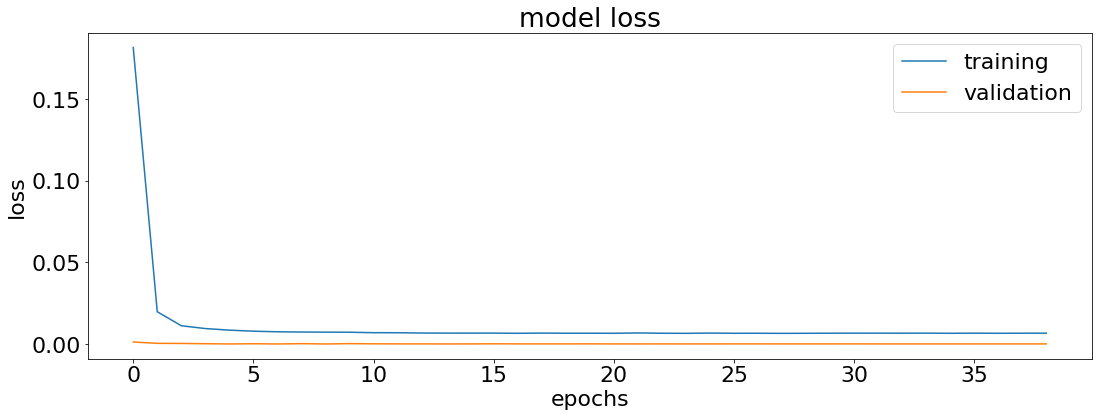

In [35]:
#parameter number of features to include
#numb_features_start=0
#numb_features_end=X_train_reshaped.shape[2]

#import tensorflow as tf
#from keras.backend import tensorflow_backend as K

#with tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=16)) as sess:
#    K.set_session(sess)


numb_features_start=0
numb_features_end=2 #X_train_reshaped.shape[2]
features=[0,1,3,6,7,10,11]
X_train_reshaped1=X_train_reshaped[:60000,:,features]
y_train_reshaped1=y_train_reshaped[:60000]
print(X_train_reshaped1.shape,y_train_reshaped1.shape)

#LSTM model parameters
outputdim=1
no_hidden_neurons=60
no_hidden_neurons1=25
no_hidden_neurons2=10
nb_epoch=500
batch_sizes=100


# Select model type
# 1: Single cell
# 2: Stacked
# 3: Bidirectional
#
model_type = 2

#trainX, trainY = create_dataset(X_train,y_train look_back)  
#testX, testY = create_dataset(X_test,y_test,look_back)

# reshape input to be  [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, 3))
#testX = numpy.reshape(testX, (testX.shape[0],look_back, 3))

# create and fit the LSTM network

#This looks like a multiple series

if model_type == 1:
    # Single cell LSTM
    model = Sequential()
    model.add(LSTM(no_hidden_neurons,activation='relu',input_shape=(X_train_reshaped1.shape[1], X_train_reshaped1.shape[2])))
    model.add(Dense(units=outputdim))
if model_type == 2:
       
    # Stacked LSTM
    model = Sequential()
    model.add(LSTM(no_hidden_neurons,activation='relu',return_sequences=True,input_shape=(X_train_reshaped1.shape[1], X_train_reshaped1.shape[2])))     
    model.add(Dropout(0.2))
    model.add(LSTM(no_hidden_neurons1, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=outputdim))
 #   model = Sequential()
 #   model.add(LSTM(no_hidden_neurons,activation='relu',return_sequences=True,input_shape=(X_train_reshaped1.shape[1], X_train_reshaped1.shape[2])))     
 #   model.add(Dropout(0.3))
 #   model.add(LSTM(no_hidden_neurons1, activation='relu',return_sequences=True))
 #   model.add(Dropout(0.3))
 #   model.add(LSTM(no_hidden_neurons2, activation='relu'))
 #   model.add(Dropout(0.3))
 #   model.add(Dense(units=outputdim))
if model_type == 3:
    # Bidirectional LSTM
    model = Sequential()
    model.add(Bidirectional(LSTM(no_hidden_neurons,activation='relu',input_shape=(X_train_reshaped1.shape[1], X_train_reshaped1.shape[2]))))
    model.add(Dense(units=outputdim))
    

model.compile(loss='mean_squared_error', optimizer='adam')
#batch_input_shape=(32, X.shape[1], X.shape[2])
if model_type != 3:
    print(model.summary())


#from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
filepath = "car_lstm_model_morecomplex_highdrop.hdf5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mcp_save = ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min',verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

#model.fit(Xtr_more, Ytr_more, batch_size=batch_size, epochs=50, verbose=0, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.25)

history= model.fit(X_train_reshaped1,y_train_reshaped1,validation_split=0.2, epochs=nb_epoch, batch_size=batch_sizes,callbacks=[es, mcp_save, reduce_lr_loss])


# Plot training
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.savefig('epoch_loss_iteration_graph_morecomplex_highdrop.png')
plt.show()
model.save('car_lstm_model-morecomplex-highdrop.h5')




plt.show()
plt.savefig('loss_lstm_cycle2.png')

X_test_reshaped[:1,:,:].shape

X_train_reshaped[:60000,:,1:3]

# load the model
load_model=1
if load_model==1: 
    new_model = load_model(filepath)
    #assert_allclose(model.predict(x_train),
    #            new_model.predict(x_train),
    #            1e-5)
    # fit the model
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    history= new_model.fit(X_train_reshaped1,y_train_reshaped1,validation_split=0.2, epochs=nb_epoch, batch_size=batch_sizes,callbacks=[earlyStopping, mcp_save, reduce_lr_loss])
# Plot training
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('épochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()
    plt.savefig('loss_lstm_cycle.png')
    model.save('lstm_model.h5')


np.mean(y_test2)


In [36]:
#1. Overfitting solution: If the above problem , still overfits, then try to reduce number of variables or increase the training data more or reduce complexity of model further or add some sort of regularization with complex model. 
#2. Dropout : Adding dropout after each layer for regularization :  model.add(Dropout(0.2))
#3. LSTM demo: https://github.com/danrustia11/WeatherLSTM/blob/master/LSTM_demo.py
#4. Above example of Multiple Input Series with one output in future
# 5. Features and sparseness and overfitting : https://stackoverflow.com/questions/37776333/why-too-many-features-cause-over-fitting

#6. Difference between classification and regression architecture: number of neurons in output, loss function and activation function at end.
#So, last neurons layers are like: model.add(Dense(len(nd.categories)))
#model.add(Activation('sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adadelta')

y_predicted = model.predict(X_test_reshaped[:,:,features], verbose=0)
#print(y_predicted,y_test_reshaped)
#plt.plot(y_predicted,y_test_reshaped,'o')
mse = mean_squared_error(y_predicted,y_test_reshaped)
r2 = r2_score(y_predicted,y_test_reshaped)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))


mse=0.0
r2=0.99


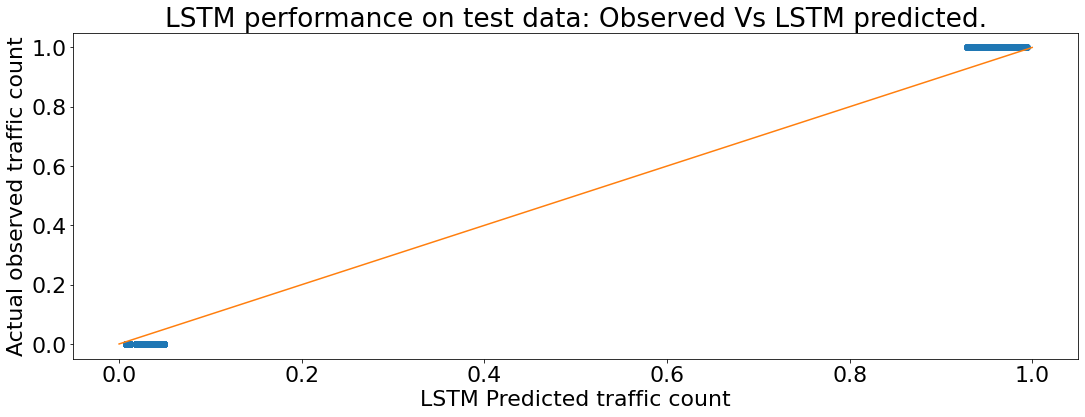

<Figure size 432x288 with 0 Axes>

In [37]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.title('LSTM performance on test data: Observed Vs LSTM predicted.')
plt.ylabel('Actual observed traffic count')
plt.xlabel('LSTM Predicted traffic count')
#plt.legend('Comparison on test data',loc='upper right')
#plt.rcParams.update({'font.size': 22})
plt.plot(y_predicted,y_test_reshaped,'o')
lx=np.linspace(0, 1, num=100)
plt.plot(lx,lx)
plt.show()
plt.savefig('car_comparison_actual_predicted.png')

plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.title('LSTM fit: Measured Vs Predicted.')
plt.ylabel('Predicted')
plt.xlabel('Measured')
#plt.legend('Comparison on test data',loc='upper right')
#plt.rcParams.update({'font.size': 22})
plt.plot(y_test_reshaped*300,y_predicted*300,'o',markersize=10)
plt.text(0,290, 'R2_score = %0.2f' %(r2))

#plt.show()
lx=np.linspace(0, 300, num=100)
plt.plot(lx,lx,'k--',linewidth=7)
plt.savefig('car_scaled300_lstm_measured_scaled.png')
plt.show()

range11=np.zeros(len(features))
range11

26.9
(60000, 60, 7)
(60000,)
mse=0.0
r2=0.99


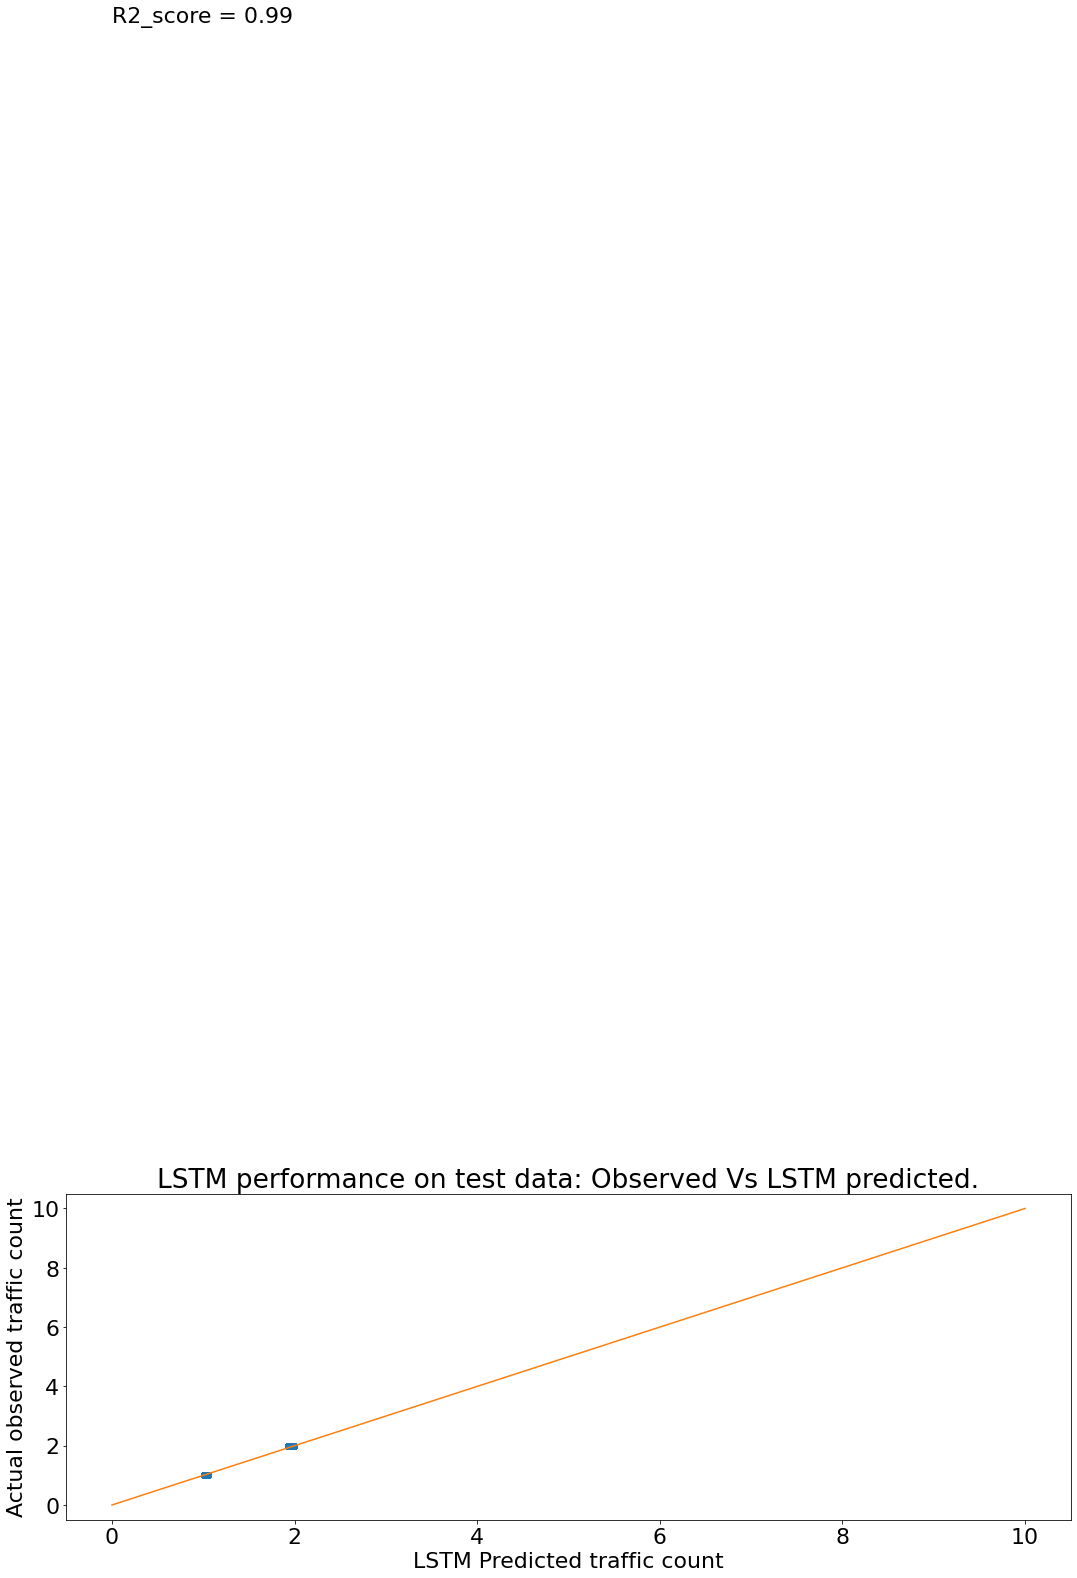

In [40]:

print(sc.data_max_[3])
range1=np.zeros(len(features))
count=0
for i in features: 
    
    #print(i)
    #print(sc.data_max_[i])
    #print(sc.data_min_[i])
    range1[count]=sc.data_max_[i]-sc.data_min_[i]
    count=count+1

trafficcount_test_predicted=y_predicted*range1[0] + sc.data_min_[0]
trafficcount_test_actual=y_test_reshaped*range1[0] + sc.data_min_[0]

print(X_train_reshaped1.shape)
print(y_train_reshaped1.shape)

mse = mean_squared_error(trafficcount_test_predicted,trafficcount_test_actual)
r2 = r2_score(trafficcount_test_predicted,trafficcount_test_actual)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))

plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.title('LSTM performance on test data: Observed Vs LSTM predicted.')
plt.ylabel('Actual observed traffic count')
plt.xlabel('LSTM Predicted traffic count')
#plt.legend('Comparison on test data',loc='upper right')
#plt.rcParams.update({'font.size': 22})
plt.plot(trafficcount_test_predicted,trafficcount_test_actual,'o')
lx=np.linspace(0, 10, num=10)
plt.plot(lx,lx)
#plt.ylim(0, 55)
#plt.xlim(0, 40)
#plt.text(0,50, 'R2_score = %0.2f \nMean_square_error = %0.2f' %(r2,mse))
plt.text(0,50, 'R2_score = %0.2f' %(r2))
plt.savefig('car_comparison_actual_predicted_scaled_morefeatures_morecomplex2_highdrop.png')
plt.show()
#plt.savefig('comparison_actual_predicted_scaled_morefeatures_morecomplex.png')

In [39]:
print(testing_set_scaled.shape)


(20332, 15)


plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.title('LSTM fit: measured Vs predicted.')
plt.ylabel('Predicted')
plt.xlabel('Measured')
#plt.legend('Comparison on test data',loc='upper right')
#plt.rcParams.update({'font.size': 22})
plt.plot(trafficcount_test_actual,trafficcount_test_predicted,'o')
lx=np.linspace(0, 300, num=20)
plt.plot(lx,lx)
#plt.ylim(0, 55)
#plt.xlim(0, 40)
#plt.text(0,50, 'R2_score = %0.2f \nMean_square_error = %0.2f' %(r2,mse))
plt.text(0,95, 'R2_score = %0.2f' %(r2))
plt.savefig('car_LSTM_comparison_actual_predicted_scaled_morefeatures_morecomplex2_highdrop.png')
plt.show()


range1

print(temperature_normal.shape)
tss=sc.inverse_transform(testing_set_scaled)            

plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,6)) 
plt.title('LSTM performance on test data: Observed/Actual Vs Temperature.')
plt.ylabel('Traffic count')
plt.xlabel('Temperature C')
temperature_normal=testing_set_scaled[look_back:,3]*range1[2] + sc.data_min_[3]
trafficcount_test_actual=y_test_reshaped*range1[0] + sc.data_min_[0]
#plt.plot(X_test_reshaped[:,:,features[1]])
#testing_set_scaled[look_back:,3]
plt.legend(['actual', 'LSTM predicted'], loc='upper right')
plt.plot(tss[look_back:,3],trafficcount_test_actual,'ro')
plt.plot(testing_setd.iloc[look_back:,3],trafficcount_test_predicted,'go',alpha=0.3)
plt.savefig('temperature_vs_count_dropouthigh.png')

print(X_train2.shape)
print(sc.data_max_[2])
print(sc.data_min_[2])
#range1=sc.data_max_[2]-sc.data_min_[2]
#wind_test_predicted=X_train2*range1 + sc.data_min_[2]
#trafficcount_test_actual=y_test_reshaped*range1 + sc.data_min_[2]

plt.plot(trafficcount_test_predicted,trafficcount_test_actual,'o')

y_predicted = model.predict(X_test_reshaped[:1,:,features], verbose=0)
print(y_predicted,y_test_reshaped[1])
plt.plot(y_predicted,y_test_reshaped[1])

# 'De-normalize' the data
#
#y_predicted_descaled = scaler.inverse_transform(y_predicted)
#y_train_descaled = scaler.inverse_transform(y_train)
#y_test_descaled = scaler.inverse_transform(y_test_reshaped)

car_data.hist('TEMP',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('TEMP',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

car_data.hist('WIND_MAG',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('WIND_MAG',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()